# System rekomendacji Spotify

### Marcin Kordas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests as rq
from dotenv import load_dotenv
import os
import time
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
%matplotlib inline
pio.renderers.default = "notebook"

# Pochodzenie danych
1. Baza danych składająca się z 586672 rekordów opisujących piosenki. Baza została przygotowana przy pomocy API Spotify i oficjalnie umieszczona na portalu [Kaggle](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv).
2. Playlista użytkownika [Spotify](https://open.spotify.com/playlist/6QlP7yHXSpL8axXwz9NIgg?si=7ca710299b274cc0&nd=1).

# Opis zmiennych
Id – unikalny identyfikator utworu

Name – Tytuł utworu

Artist – Wykonawca/Wykonawcy

Release date – Data wydania/publikacji utworu

duration_ms – Czas trwania utworu wyrażony w milisekundach [ms]

Popularity – Obliczona specjalnym algorytmem popularność określana w skali od 1 do 100, gdzie 100 to możliwie najbardziej popularna. Bazuje na liczbie odsłuchów połączoną z informacją dotyczącą ich aktualności. Często odtwarzane piosenki aktualnie będą miały większą wartość niż te często odtwarzane rok temu.

Explicit –  Zmienna binarna informująca o tym czy utwór uznawany jest za wulgarny

Acousticness – Akustyczność utworu wyrażona w skali od 0 do 1

Danceability – zmienna opisująca jak odpowiedni do tańca jest dany utwór. Wyrażona w skali od 0 do 1. Składają się na nią kombinacja elementów muzycznych jak tempo, stabilność/powtarzalność rytmu czy siła beat’u.

Energy – Energia jest miarą reprezentującą percepcyjną miarę intensywności i aktywności. Składowe to między innymi głośność, barwa dźwięku czy ogólna entropia. Wyrażana w skali od 0 do 1.

Instrumentalness – Opisuje jak bardzo utwór jest instrumentalny. Wyrażana w skali od 0 do 1, gdzie wartości bliskie 1 oznaczają większe prawdopodobieństwo, że utwór nie zawiera treści wokalnych.

Key – Klucz, w którym znajduje się ścieżka. Liczby całkowite odwzorowują tutaj tony standardowej notacji „Pitch Class”. Np. 0 = C, 1 = C#/Db, 2 = D. Wartość -1 oznacza brak wykrytego klucza. Wartości całkowite od -1 do 11.

Liveness – Zmienna wykrywająca obecność publiczności w nagraniu co wskazuje na pochodzenie utworu z wykonania na żywo. Wyższa wartość wskazuje na większe prawdopodobieństwo na wersję „live” utworu. Wyrażana w skali od 0 do 1.

Loudness – Ogólna głośność utworu w decybelach (dB). Uśredniane dla całej ścieżki. Zwykle w zakresie od -60 do 0 dB.

Mode – Zmienna wskazująca na modalność utworu (dur lub moll). Z niej wywodzi się jego zawartość melodyczna. Zmienna binarna. 1 oznacza dur (major) a 0 mol (minor)

Speechiness – Zmienna wykrywająca obecność wypowiadanych słów w utworze. Im bardziej nagranie przypomina mowę tym wyższa jej wartość. Wyrażana w skali od 0 do 1.

Tempo – szacunkowe tempo utworu w uderzeniach na minutę (BPM)

Time_signature – szacowane metrum, czyli liczba uderzeń w każdym takcie. Wyrażana jako liczby naturalne od 3 do 7 wskazując na metrum od ¾ do 7/4.

Valence – Miara od 0,0 do 1,0 opisująca muzyczną pozytywność przekazywaną przez utwór. Utwory o wysokiej wartościowości brzmią bardziej pozytywnie (np. radosne, wesołe, euforyczne)


# Wczytanie bazy danych

In [3]:
musicDF = pd.read_csv("tracks.csv")
musicDF.head(10)

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   
5  0BRXJHRNGQ3W4v9frnSfhu                            Ave Maria           0   
6  0Dd9ImXtAtGwsmsAD69KZT                       La Butte Rouge           0   
7  0IA0Hju8CAgYfV1hwhidBH                              La Java           0   
8  0IgI1UCz84pYeVetnl1lGP                   Old Fashioned Girl           0   
9  0JV4iqw2lSKJaHBQZ0e5zK        Martín Fierro - Remasterizado           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   
5       178933         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   
6       134467         0    ['Francis Marty']  ['2nuMRGzeJ5jJEKlfS7rZ0W']   
7       161427         0      ['Mistinguett']  ['4AxgXfD7ISvJSTObqm4aIE']   
8       310073         0      ['Greg Fieler']  ['5nWlsH5RDgFuRAiDeOFVmf']   
9       181173         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   
5         1922         0.227  0.2610    5   -12.343     1       0.0382   
6         1922         0.510  0.3550    4   -12.833     1       0.1240   
7         1922         0.563  0.1840    4   -13.757     1       0.0512   
8         1922         0.488  0.4750    0   -16.222     0       0.0399   
9   1922-03-29         0.548  0.0391    6   -23.228     1       0.1530   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674          0.744000    0.1510   0.1270  104.851               3  
1         0.797          0.000000    0.1480   0.6550  102.009               1  
2         0.994          0.021800    0.2120   0.4570  130.418               5  
3         0.995          0.918000    0.1040   0.3970  169.980               3  
4         0.989          0.130000    0.3110   0.1960  103.220               4  
5         0.994          0.247000    0.0977   0.0539  118.891               4  
6         0.965          0.000000    0.1550   0.7270   85.754               5  
7         0.993          0.000016    0.3250   0.6540  133.088               3  
8         0.620          0.006450    0.1070   0.5440  139.952               4  
9         0.996          0.933000    0.1480   0.6120   75.595               3

# Pobranie playlisty użytkownika

In [4]:
load_dotenv()
TOKEN = 'BQDMfCSaSK0hbZNd9igNkTtwZLi_ycR13E8isdlcp4lAtZk4HFrfzxH0rVhyHfPb_QFnacM3x-XR-ny3QfIVrXI6zZ7FOIoKoKLUul-9DVHZYAdbBLqp4_uHNOlRQsTUy9nVEzd1jD16X9SmUxczo8Yi0HUtDJVxZZWLVbYKOoFP'
# TOKEN = os.environ.get("TOKEN")
playlistID = "6QlP7yHXSpL8axXwz9NIgg"
endpoint = f"https://api.spotify.com/v1/playlists/{playlistID}/tracks?fields=items(track(name%2Cid))&limit=100&offset="
headers = {
    "Authorization": "Bearer " + TOKEN
}
offset = 0
flag = True
tracks = []
while flag:
    response = rq.get(endpoint+str(offset), headers=headers)
    if response.status_code != 200:
        raise ConnectionError(f"Zepsuło {response.text}")
    if len(response.json()["items"]) == 0:
        flag = False
        break
    playlistItems = response.json()["items"]
    playlistItems = [track["track"] for track in playlistItems]
    tracks += playlistItems
    offset += 100
    print(offset)
    time.sleep(1)

100
200
300
400


In [5]:
print(f"Liczba piosenek w playliście {len(tracks)}")

Liczba piosenek w playliście 373


## Czyszczenie danych

In [6]:
playlist = pd.DataFrame(tracks)[["id","name"]]

In [7]:
print(f"Liczba unikalnych piosenek w playliście {len(set(playlist.id))}")

Liczba unikalnych piosenek w playliście 352


#### Identyfikacja piosenek z playlisty, które znajdują się w globalnej bazie danych

In [8]:
IDsInDF = set(playlist["id"]) - (set(playlist["id"]) - set(musicDF["id"]))

In [9]:
print(f"Liczba piosenek, które znajdują się w bazie danych {len(IDsInDF)}")

Liczba piosenek, które znajdują się w bazie danych 225


### Uzupełnienie pobranych danych o dane z bazy danych

In [10]:
fullDataDF = musicDF[musicDF["id"].isin(list(IDsInDF))]

### Pobranie informacji o piosenkach, które nie znalazły się w bazie danych

#### Zidentyfikowanie piosenek, które nie znajdują się w bazie

In [11]:
IDsNotInDF = list(set(playlist["id"]) - set(musicDF["id"]))

In [12]:
print(f"Liczba piosenek, które nie znajdują się w bazie danych {len(IDsNotInDF)}")

Liczba piosenek, które nie znajdują się w bazie danych 127


#### Pobieranie brakujących cech utworów

In [13]:
featureEndpoint = "https://api.spotify.com/v1/audio-features/"
featuresList = []
for idTrack in IDsNotInDF:
    response = rq.get(featureEndpoint + idTrack, headers=headers)
    if response.status_code != 200:
        print(f"{response.status_code}")
        continue
    trackFeature = response.json()
    trackFeature["id"] = idTrack
    featuresList.append(trackFeature)
featuresListDF = pd.DataFrame(featuresList)

404


#### Ramka daych zwierająca piosenki nie znajdujące się w bazie danych

In [22]:
missingDataDF = pd.DataFrame(playlist[playlist["id"].isin(IDsNotInDF)],columns=fullDataDF.columns)

In [23]:
print(f"Liczba unikalnych piosenek do uzupełnienia: {len(set(missingDataDF.id))}")
print(f"Liczba piosenek do uzupełnienia: {len(missingDataDF.id)}")

Liczba unikalnych piosenek do uzupełnienia: 127
Liczba piosenek do uzupełnienia: 130


In [24]:
columns = list(set(featuresListDF.columns) - (set(featuresListDF.columns) - set(missingDataDF.columns)))
columns

['time_signature',
 'instrumentalness',
 'danceability',
 'speechiness',
 'id',
 'energy',
 'valence',
 'mode',
 'key',
 'liveness',
 'tempo',
 'acousticness',
 'duration_ms',
 'loudness']

In [25]:
featuresListDF.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.902   0.805    6    -5.003     1       0.0468       0.07480   
1         0.740   0.881    7    -4.495     1       0.0862       0.24700   
2         0.770   0.873    0    -3.500     0       0.0443       0.01030   
3         0.808   0.854    4    -5.904     1       0.1180       0.00888   
4         0.641   0.570    0   -12.284     0       0.1500       0.01810   
5         0.586   0.915   11    -3.068     1       0.0630       0.04540   
6         0.681   0.876   10    -2.830     1       0.0514       0.05150   
7         0.730   0.833    0    -6.840     1       0.0363       0.03900   
8         0.746   0.904    7    -6.459     1       0.0648       0.00341   
9         0.634   0.924    1    -2.634     1       0.1430       0.04160   

   instrumentalness  liveness  valence    tempo            type  \
0          0.082300    0.0914    0.745  124.985  audio_features   
1          0.000000    0.4540    0.545  125.014  audio_features   
2          0.000042    0.3310    0.513  135.030  audio_features   
3          0.000000    0.3530    0.580  126.944  audio_features   
4          0.018900    0.7700    0.611  144.985  audio_features   
5          0.000012    0.2240    0.205  128.017  audio_features   
6          0.000003    0.3360    0.680  124.974  audio_features   
7          0.000647    0.2540    0.862  128.009  audio_features   
8          0.000002    0.6230    0.966  140.046  audio_features   
9          0.000013    0.1820    0.864  110.001  audio_features   

                       id                                   uri  \
0  37dYAkMa4lzRCH6kDbMT1L  spotify:track:37dYAkMa4lzRCH6kDbMT1L   
1  38ryCMNFOZ6GW5udIFnQI7  spotify:track:38ryCMNFOZ6GW5udIFnQI7   
2  1oqPbHwqFAa7In2LQWn6GF  spotify:track:1oqPbHwqFAa7In2LQWn6GF   
3  668g0g2GzxmtuqEAxZJaWI  spotify:track:668g0g2GzxmtuqEAxZJaWI   
4  3d4Zk5l0sczH2tTUcs9p0a  spotify:track:3d4Zk5l0sczH2tTUcs9p0a   
5  74qY57XDx0sSUbVnQ8kosS  spotify:track:74qY57XDx0sSUbVnQ8kosS   
6  1c5OFuFta6Aw28BSfFBHk0  spotify:track:1c5OFuFta6Aw28BSfFBHk0   
7  7sEjURQgyLG4SxlbMIMoDw  spotify:track:7sEjURQgyLG4SxlbMIMoDw   
8  0BYcXkHImpKxTe82TXvB6C  spotify:track:0BYcXkHImpKxTe82TXvB6C   
9  2s6gczjAQ0QfBlnJbRRA2a  spotify:track:2s6gczjAQ0QfBlnJbRRA2a   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/37dYAkMa4lzR...   
1  https://api.spotify.com/v1/tracks/38ryCMNFOZ6G...   
2  https://api.spotify.com/v1/tracks/1oqPbHwqFAa7...   
3  https://api.spotify.com/v1/tracks/668g0g2Gzxmt...   
4  https://api.spotify.com/v1/tracks/3d4Zk5l0sczH...   
5  https://api.spotify.com/v1/tracks/74qY57XDx0sS...   
6  https://api.spotify.com/v1/tracks/1c5OFuFta6Aw...   
7  https://api.spotify.com/v1/tracks/7sEjURQgyLG4...   
8  https://api.spotify.com/v1/tracks/0BYcXkHImpKx...   
9  https://api.spotify.com/v1/tracks/2s6gczjAQ0Qf...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/37dY...       157438   
1  https://api.spotify.com/v1/audio-analysis/38ry...       196507   
2  https://api.spotify.com/v1/audio-analysis/1oqP...       247915   
3  https://api.spotify.com/v1/audio-analysis/668g...       210000   
4  https://api.spotify.com/v1/audio-analysis/3d4Z...       211862   
5  https://api.spotify.com/v1/audio-analysis/74qY...       215295   
6  https://api.spotify.com/v1/audio-analysis/1c5O...       202149   
7  https://api.spotify.com/v1/audio-analysis/7sEj...       235160   
8  https://api.spotify.com/v1/audio-analysis/0BYc...       180857   
9  https://api.spotify.com/v1/audio-analysis/2s6g...       215440   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4  
5               4  
6               4  
7               4  
8               4  
9               4

In [26]:
print(f"Liczba piosenek, których nie udało się uzupełnić: {len(set(missingDataDF.id) - set(featuresListDF.id))}")

Liczba piosenek, których nie udało się uzupełnić: 1


In [27]:
missingDataDF = missingDataDF.set_index("id").combine_first(featuresListDF[[*columns]].set_index("id"))
missingDataDF.head(10)

acousticness  artists  danceability  duration_ms  \
id                                                                         
01kVVoJQuWVqaOvRgRztJD       0.00136      NaN         0.759     240933.0   
027WgwrVwUQdngdRuTEEEL       0.01920      NaN         0.839     165558.0   
02FNO6WJyWr7C47PgPoRAW       0.08830      NaN         0.893     181219.0   
02ktliEklMgNUiyiQzipk3       0.01150      NaN         0.791     255000.0   
04GCNxpKDglYG4gfzKCSyj       0.04560      NaN         0.647     227493.0   
05iCwrGpNg0bw1x5KR3a0C       0.00421      NaN         0.698     192947.0   
05vIFEbXYpmGOsLgWZVJCX       0.03560      NaN         0.730     208676.0   
05wrtdnqihfhy54iGFZ0rV       0.00906      NaN         0.829     359298.0   
0BYcXkHImpKxTe82TXvB6C       0.00341      NaN         0.746     180857.0   
0CzJlMusD7CyBa7H9VyxC6       0.03390      NaN         0.675     218703.0   

                        energy  explicit  id_artists  instrumentalness   key  \
id                                                                             
01kVVoJQuWVqaOvRgRztJD   0.822       NaN         NaN          0.017100   5.0   
027WgwrVwUQdngdRuTEEEL   0.705       NaN         NaN          0.001030   6.0   
02FNO6WJyWr7C47PgPoRAW   0.673       NaN         NaN          0.000031   0.0   
02ktliEklMgNUiyiQzipk3   0.942       NaN         NaN          0.003690  11.0   
04GCNxpKDglYG4gfzKCSyj   0.673       NaN         NaN          0.000000  11.0   
05iCwrGpNg0bw1x5KR3a0C   0.874       NaN         NaN          0.017500   1.0   
05vIFEbXYpmGOsLgWZVJCX   0.640       NaN         NaN          0.000000   9.0   
05wrtdnqihfhy54iGFZ0rV   0.746       NaN         NaN          0.866000   2.0   
0BYcXkHImpKxTe82TXvB6C   0.904       NaN         NaN          0.000002   7.0   
0CzJlMusD7CyBa7H9VyxC6   0.731       NaN         NaN          0.000853   2.0   

                        liveness  loudness  mode  \
id                                                 
01kVVoJQuWVqaOvRgRztJD    0.1310    -7.268   0.0   
027WgwrVwUQdngdRuTEEEL    0.3440    -7.869   1.0   
02FNO6WJyWr7C47PgPoRAW    0.1070    -6.134   1.0   
02ktliEklMgNUiyiQzipk3    0.0960    -2.299   0.0   
04GCNxpKDglYG4gfzKCSyj    0.1080    -6.875   0.0   
05iCwrGpNg0bw1x5KR3a0C    0.3620    -3.523   1.0   
05vIFEbXYpmGOsLgWZVJCX    0.3200    -6.703   1.0   
05wrtdnqihfhy54iGFZ0rV    0.1070    -7.405   1.0   
0BYcXkHImpKxTe82TXvB6C    0.6230    -6.459   1.0   
0CzJlMusD7CyBa7H9VyxC6    0.0954    -4.663   0.0   

                                                                     name  \
id                                                                          
01kVVoJQuWVqaOvRgRztJD                                   Sing Hallelujah!   
027WgwrVwUQdngdRuTEEEL                   One Desire - Mondotek Radio Edit   
02FNO6WJyWr7C47PgPoRAW                                   Gasolina - Remix   
02ktliEklMgNUiyiQzipk3  Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...   
04GCNxpKDglYG4gfzKCSyj                         Down - Chasing Pluto Remix   
05iCwrGpNg0bw1x5KR3a0C               Problem - Noodles & Devastator Remix   
05vIFEbXYpmGOsLgWZVJCX                                             Jeżyk!   
05wrtdnqihfhy54iGFZ0rV                                               OKAY   
0BYcXkHImpKxTe82TXvB6C                                       Iza z Matiza   
0CzJlMusD7CyBa7H9VyxC6                          Show Me Love - Radio Edit   

                        popularity  release_date  speechiness    tempo  \
id                                                                       
01kVVoJQuWVqaOvRgRztJD         NaN           NaN       0.0367  124.713   
027WgwrVwUQdngdRuTEEEL         NaN           NaN       0.0722  130.032   
02FNO6WJyWr7C47PgPoRAW         NaN           NaN       0.1510  102.000   
02ktliEklMgNUiyiQzipk3         NaN           NaN       0.0524  128.015   
04GCNxpKDglYG4gfzKCSyj         NaN           NaN       0.0899  131.930   
05iCwrGpNg0bw1x5KR3a0C         NaN           NaN       0.0881  103.013   
05vIFEbX

#### Uzupełnienie brakujących danych (np. popularity, explicit, release_date) pochądzących z innego API endpoint

In [28]:
trackEndpoint = "https://api.spotify.com/v1/tracks/"
trackList = []
for idTrack in IDsNotInDF:
    response = rq.get(trackEndpoint + idTrack, headers=headers)
    if response.status_code != 200:
        print(f"{response.status_code}")
        continue
    trackFeature = response.json()
    trackFeature["id"] = idTrack
    temp = {
        'popularity' : trackFeature["popularity"],
        'id': idTrack,
        'explicit': 1 if trackFeature["explicit"] else 0,
        'release_date': trackFeature["album"]["release_date"],
        'artists': [artists["name"] for artists in trackFeature["artists"]],
        'id_artists': [artists["id"] for artists in trackFeature["artists"]],
    }
    trackList.append(temp)

In [29]:
featuresListDF = pd.DataFrame(trackList)
missingDataDF = missingDataDF.combine_first(featuresListDF.set_index("id"))
missingDataDF.head(10)

acousticness  \
id                                     
01kVVoJQuWVqaOvRgRztJD       0.00136   
027WgwrVwUQdngdRuTEEEL       0.01920   
02FNO6WJyWr7C47PgPoRAW       0.08830   
02ktliEklMgNUiyiQzipk3       0.01150   
04GCNxpKDglYG4gfzKCSyj       0.04560   
05iCwrGpNg0bw1x5KR3a0C       0.00421   
05vIFEbXYpmGOsLgWZVJCX       0.03560   
05wrtdnqihfhy54iGFZ0rV       0.00906   
0BYcXkHImpKxTe82TXvB6C       0.00341   
0CzJlMusD7CyBa7H9VyxC6       0.03390   

                                                                  artists  \
id                                                                          
01kVVoJQuWVqaOvRgRztJD                                        [Dr. Alban]   
027WgwrVwUQdngdRuTEEEL                                          [Jakarta]   
02FNO6WJyWr7C47PgPoRAW                                          [Tomi DJ]   
02ktliEklMgNUiyiQzipk3  [David Guetta, Albert Harvey, GLOWINTHEDARK, K...   
04GCNxpKDglYG4gfzKCSyj                              [Jay Sean, Lil Wayne]   
05iCwrGpNg0bw1x5KR3a0C  [Ariana Grande, Iggy Azalea, DJ Noodles, Devas...   
05vIFEbXYpmGOsLgWZVJCX                              [Oki, Nolyrics Beats]   
05wrtdnqihfhy54iGFZ0rV                                        [Shiba San]   
0BYcXkHImpKxTe82TXvB6C                                            [Diley]   
0CzJlMusD7CyBa7H9VyxC6                                         [Doctor Y]   

                        danceability  duration_ms  energy  explicit  \
id                                                                    
01kVVoJQuWVqaOvRgRztJD         0.759     240933.0   0.822       0.0   
027WgwrVwUQdngdRuTEEEL         0.839     165558.0   0.705       0.0   
02FNO6WJyWr7C47PgPoRAW         0.893     181219.0   0.673       0.0   
02ktliEklMgNUiyiQzipk3         0.791     255000.0   0.942       0.0   
04GCNxpKDglYG4gfzKCSyj         0.647     227493.0   0.673       0.0   
05iCwrGpNg0bw1x5KR3a0C         0.698     192947.0   0.874       0.0   
05vIFEbXYpmGOsLgWZVJCX         0.730     208676.0   0.640       1.0   
05wrtdnqihfhy54iGFZ0rV         0.829     359298.0   0.746       0.0   
0BYcXkHImpKxTe82TXvB6C         0.746     180857.0   0.904       0.0   
0CzJlMusD7CyBa7H9VyxC6         0.675     218703.0   0.731       0.0   

                                                               id_artists  \
id                                                                          
01kVVoJQuWVqaOvRgRztJD                           [6BkcAbUkfIBM4XudxieMq8]   
027WgwrVwUQdngdRuTEEEL                           [2XNoEm5xVQP4qeSymQZFO2]   
02FNO6WJyWr7C47PgPoRAW                           [5jqEd3NCMvmQs4aSofg4xO]   
02ktliEklMgNUiyiQzipk3  [1Cs0zKBU1kc0i8ypK3B9ai, 51C5aflbER1i88LI75Q80...   
04GCNxpKDglYG4gfzKCSyj   [4pADjHPWyrlAF0FA7joK2H, 55Aa2cqylxrFIXC767Z865]   
05iCwrGpNg0bw1x5KR3a0C  [66CXWjxzNUsdJxJ2JdwvnR, 5yG7ZAZafVaAlMTeBybKA...   
05vIFEbXYpmGOsLgWZVJCX   [1oxn6cQ37twQ7yGnlE3ETd, 4z9oiedO8ugGNpfbJcg0iq]   
05wrtdnqihfhy54iGFZ0rV                           [7Hr9bE0u9Rl5n6QahVNRnc]   
0BYcXkHImpKxTe82TXvB6C                           [6ELctmHeJnQAWHaD1pH3sS]   
0CzJlMusD7CyBa7H9VyxC6                           [5Tfn0mwTWAvYUacFDhBWXr]   

                        instrumentalness   key  liveness  loudness  mode  \
id                                                                         
01kVVoJQuWVqaOvRgRztJD          0.017100   5.0    0.1310    -7.268   0.0   
027WgwrVwUQdngdRuTEEEL          0.001030   6.0    0.3440    -7.869   1.0   
02FNO6WJyWr7C47PgPoRAW          0.000031   0.0    0.1070    -6.134   1.0   
02ktliEklMgNUiyiQzipk3          0.003690  11.0    0.0960    -2.299   0.0   
04GCNxpKDglYG4gfzKCSyj          0.000000  11.0    0.1080    -6.875   0.0   
05iCwrGpNg0bw1x5KR3a0C          0.017500   1.0    0.3620    -3.523   1.0   
05vIFEbXYpmGOsLgWZVJCX          0.000000   9.0    0.3200    -6.703   1.0   
05wrtdnqihfhy54iGFZ0rV          0.866000   2.0    0.1070    -7.405   1.0   
0BYcXkHImpKxTe82TXvB6C          0.000002   7.0    0.6230    -6.459   1.0   
0CzJ

In [30]:
playlist = pd.concat([fullDataDF.set_index("id"), missingDataDF])
playlist.head(10)

name  \
id                                                                     
1TfqLAPs4K3s2rJMoCokcS  Sweet Dreams (Are Made of This) - Remastered   
6NLAzDPHSlV2bl7XbmivOq             Rhythm Is A Dancer - 12'' Version   
4RADreHMvMkZwsPgPr9z5c                  Rhythm Is A Dancer - 7" Edit   
2ahnofp2LbBWDXcJbMaSTu                         What Is Love - 7" Mix   
4ih3dyFZoeTdaeJW9mPbOI                Mr. Vain - Original Radio Edit   
7voHUmPNDuYZ1SW1mwRu26                        No limit - RAP VERSION   
5fRvePkRGdpn2nKacG7I6d                                   Coco Jamboo   
2L5FEDC0MU2a6OEkLjByEd                      Captain Jack - Short Mix   
7obdw7ZGr6l1GqSBkFiY11                 Macarena - Bayside Boys Remix   
5ZrDlcxIDZyjOzHdYW1ydr                                   Barbie Girl   

                        popularity  duration_ms  explicit  \
id                                                          
1TfqLAPs4K3s2rJMoCokcS        83.0     216933.0       0.0   
6NLAzDPHSlV2bl7XbmivOq        64.0     316138.0       0.0   
4RADreHMvMkZwsPgPr9z5c        70.0     225882.0       0.0   
2ahnofp2LbBWDXcJbMaSTu        72.0     270373.0       0.0   
4ih3dyFZoeTdaeJW9mPbOI        70.0     257467.0       0.0   
7voHUmPNDuYZ1SW1mwRu26        66.0     224221.0       0.0   
5fRvePkRGdpn2nKacG7I6d        73.0     218733.0       0.0   
2L5FEDC0MU2a6OEkLjByEd        63.0     248533.0       0.0   
7obdw7ZGr6l1GqSBkFiY11        54.0     251797.0       0.0   
5ZrDlcxIDZyjOzHdYW1ydr        73.0     197960.0       0.0   

                                                               artists  \
id                                                                       
1TfqLAPs4K3s2rJMoCokcS  ['Eurythmics', 'Annie Lennox', 'Dave Stewart']   
6NLAzDPHSlV2bl7XbmivOq                                       ['SNAP!']   
4RADreHMvMkZwsPgPr9z5c                                       ['SNAP!']   
2ahnofp2LbBWDXcJbMaSTu                                    ['Haddaway']   
4ih3dyFZoeTdaeJW9mPbOI                                ['Culture Beat']   
7voHUmPNDuYZ1SW1mwRu26                                 ['2 Unlimited']   
5fRvePkRGdpn2nKacG7I6d                               ['Mr. President']   
2L5FEDC0MU2a6OEkLjByEd                                ['Captain Jack']   
7obdw7ZGr6l1GqSBkFiY11                                 ['Los Del Rio']   
5ZrDlcxIDZyjOzHdYW1ydr                                        ['Aqua']   

                                                               id_artists  \
id                                                                          
1TfqLAPs4K3s2rJMoCokcS  ['0NKDgy9j66h3DLnN8qu1bB', '5MspMQqdVbdwP6ax3G...   
6NLAzDPHSlV2bl7XbmivOq                         ['2FrKQPjJe4pVMZOgm0ESOx']   
4RADreHMvMkZwsPgPr9z5c                         ['2FrKQPjJe4pVMZOgm0ESOx']   
2ahnofp2LbBWDXcJbMaSTu                         ['0Suv0tRrNrUlRzAy8aXjma']   
4ih3dyFZoeTdaeJW9mPbOI                         ['0BZ3BHzfYwpd3k5TDnvAz8']   
7voHUmPNDuYZ1SW1mwRu26                         ['18JD8DVlD1fakDAw7E9LFC']   
5fRvePkRGdpn2nKacG7I6d                         ['7KBkgunlONG7LPxs93pgpp']   
2L5FEDC0MU2a6OEkLjByEd                         ['1b81zU0IfjHE8krv2IZ0Hf']   
7obdw7ZGr6l1GqSBkFiY11                         ['2JXn03fudjyRkQ1Ye9f5rk']   
5ZrDlcxIDZyjOzHdYW1ydr                         ['6kBjAFKyd0he7LiA5GQ3Gz']   

                       release_date  danceability  energy  key  loudness  \
id                                                                         
1TfqLAPs4K3s2rJMoCokcS   1983-01-04         0.692   0.711  0.0    -7.498   
6NLAzDPHSlV2bl7XbmivOq         1991         0.767   0.869  9.0    -7.323   
4RADreHMvMkZwsPgPr9z5c   1992-01-01         0.794   0.745  9.0   -11.367   
2ahnofp2LbBWDXcJbMaSTu   1993-03-22         0.683   0.772  7.0    -7.907   
4ih3dyFZoeTdaeJW9mPbOI   1993-01-01         0.703   0.997  9.0    -7.666   
7voHUmPNDuYZ1SW1mwRu26   1993-05-10         0.650   0.985  5.0   -14.404   
5fRvePkRGdpn2nKacG7I6d   1996-05-17         

# Oczyszczenie danych

#### Znalezienie i pozbycie się duplikatów

In [31]:
playlist[playlist.index.duplicated(False)]

name  popularity  \
id                                                                            
0xfMlIW8lS40qvpsUw1l0X                         Never Going Home        73.0   
0xfMlIW8lS40qvpsUw1l0X                         Never Going Home        73.0   
2Ln1SFoLWYtNwS98uL5G4a  She Doesn't Mind - DJ Laszlo Radio Edit        57.0   
2Ln1SFoLWYtNwS98uL5G4a  She Doesn't Mind - DJ Laszlo Radio Edit        57.0   
59o6ojGNGJOYiVJSzC6Lsa   Memories (feat. Kid Cudi) - 2021 Remix        74.0   
59o6ojGNGJOYiVJSzC6Lsa   Memories (feat. Kid Cudi) - 2021 Remix        74.0   

                        duration_ms  explicit                   artists  \
id                                                                        
0xfMlIW8lS40qvpsUw1l0X     169945.0       0.0                   [Kungs]   
0xfMlIW8lS40qvpsUw1l0X     169945.0       0.0                   [Kungs]   
2Ln1SFoLWYtNwS98uL5G4a     250116.0       0.0    [Sean Paul, DJ Laszlo]   
2Ln1SFoLWYtNwS98uL5G4a     250116.0       0.0    [Sean Paul, DJ Laszlo]   
59o6ojGNGJOYiVJSzC6Lsa          NaN       1.0  [David Guetta, Kid Cudi]   
59o6ojGNGJOYiVJSzC6Lsa          NaN       1.0  [David Guetta, Kid Cudi]   

                                                              id_artists  \
id                                                                         
0xfMlIW8lS40qvpsUw1l0X                          [7keGfmQR4X5w0two1xKZ7d]   
0xfMlIW8lS40qvpsUw1l0X                          [7keGfmQR4X5w0two1xKZ7d]   
2Ln1SFoLWYtNwS98uL5G4a  [3Isy6kedDrgPYoTS1dazA9, 0rvKUcq439p6nDHOhiVzVi]   
2Ln1SFoLWYtNwS98uL5G4a  [3Isy6kedDrgPYoTS1dazA9, 0rvKUcq439p6nDHOhiVzVi]   
59o6ojGNGJOYiVJSzC6Lsa  [1Cs0zKBU1kc0i8ypK3B9ai, 0fA0VVWsXO9YnASrzqfmYu]   
59o6ojGNGJOYiVJSzC6Lsa  [1Cs0zKBU1kc0i8ypK3B9ai, 0fA0VVWsXO9YnASrzqfmYu]   

                       release_date  danceability  energy  key  loudness  \
id                                                                         
0xfMlIW8lS40qvpsUw1l0X   2021-05-21         0.836   0.846  0.0    -4.673   
0xfMlIW8lS40qvpsUw1l0X   2021-05-21         0.836   0.846  0.0    -4.673   
2Ln1SFoLWYtNwS98uL5G4a   2012-05-01         0.714   0.924  7.0    -4.227   
2Ln1SFoLWYtNwS98uL5G4a   2012-05-01         0.714   0.924  7.0    -4.227   
59o6ojGNGJOYiVJSzC6Lsa   2021-01-08           NaN     NaN  NaN       NaN   
59o6ojGNGJOYiVJSzC6Lsa   2021-01-08           NaN     NaN  NaN       NaN   

                        mode  speechiness  acousticness  instrumentalness  \
id                                                                          
0xfMlIW8lS40qvpsUw1l0X   1.0       0.0392       0.09070          0.047000   
0xfMlIW8lS40qvpsUw1l0X   1.0       0.0392       0.09070          0.047000   
2Ln1SFoLWYtNwS98uL5G4a   1.0       0.0639       0.00722          0.000324   
2Ln1SFoLWYtNwS98uL5G4a   1.0       0.0639       0.00722          0.000324   
59o6ojGNGJOYiVJSzC6Lsa   NaN          NaN           NaN               NaN   
59o6ojGNGJOYiVJSzC6Lsa   NaN          NaN           NaN               NaN   

                        liveness  valence    tempo  time_signature  
id                                                                  
0xfMlIW8lS40qvpsUw1l0X    0.0570    0.942  122.042             4.0  
0xfMlIW8lS40qvpsUw1l0X    0.0570    0.942  122.042             4.0  
2Ln1SFoLWYtNwS98uL5G4a    0.0368    0.592  129.035             4.0  
2Ln1SFoLWYtNwS98uL5G4a    0.0368    0.592  129.035             4.0  
59o6ojGNGJOYiVJSzC6Lsa       NaN      NaN      NaN             NaN  
59o6ojGNGJOYiVJSzC6Lsa       NaN      NaN      NaN             NaN

In [32]:
playlist = playlist[~playlist.index.duplicated(keep="first")]

### Informacje o ramce danych

In [33]:
playlist.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 1TfqLAPs4K3s2rJMoCokcS to 7sEjURQgyLG4SxlbMIMoDw
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              352 non-null    object 
 1   popularity        352 non-null    float64
 2   duration_ms       351 non-null    float64
 3   explicit          352 non-null    float64
 4   artists           352 non-null    object 
 5   id_artists        352 non-null    object 
 6   release_date      352 non-null    object 
 7   danceability      351 non-null    float64
 8   energy            351 non-null    float64
 9   key               351 non-null    float64
 10  loudness          351 non-null    float64
 11  mode              351 non-null    float64
 12  speechiness       351 non-null    float64
 13  acousticness      351 non-null    float64
 14  instrumentalness  351 non-null    float64
 15  liveness          351 non-null    float64
 16  valence  

### Oczyszczenie z pustych wierszy

In [34]:
playlist.isnull().any()

name                False
popularity          False
duration_ms          True
explicit            False
artists             False
id_artists          False
release_date        False
danceability         True
energy               True
key                  True
loudness             True
mode                 True
speechiness          True
acousticness         True
instrumentalness     True
liveness             True
valence              True
tempo                True
time_signature       True
dtype: bool

In [35]:
playlist[playlist.isnull().values.any(axis=1)]

name  popularity  \
id                                                                           
59o6ojGNGJOYiVJSzC6Lsa  Memories (feat. Kid Cudi) - 2021 Remix        74.0   

                        duration_ms  explicit                   artists  \
id                                                                        
59o6ojGNGJOYiVJSzC6Lsa          NaN       1.0  [David Guetta, Kid Cudi]   

                                                              id_artists  \
id                                                                         
59o6ojGNGJOYiVJSzC6Lsa  [1Cs0zKBU1kc0i8ypK3B9ai, 0fA0VVWsXO9YnASrzqfmYu]   

                       release_date  danceability  energy  key  loudness  \
id                                                                         
59o6ojGNGJOYiVJSzC6Lsa   2021-01-08           NaN     NaN  NaN       NaN   

                        mode  speechiness  acousticness  instrumentalness  \
id                                                                          
59o6ojGNGJOYiVJSzC6Lsa   NaN          NaN           NaN               NaN   

                        liveness  valence  tempo  time_signature  
id                                                                
59o6ojGNGJOYiVJSzC6Lsa       NaN      NaN    NaN             NaN

In [36]:
playlist_with_nulls = playlist.copy()
playlist = playlist_with_nulls.dropna()

In [37]:
playlist[playlist.isnull().values.any(axis=1)]

Empty DataFrame
Columns: [name, popularity, duration_ms, explicit, artists, id_artists, release_date, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature]
Index: []

### Ujednolicenie danych

In [ ]:
playlist.loc[:, "release_date"] = playlist.copy().loc[:, "release_date"].str[:4]
playlist.loc[:, "release_date"] = playlist.copy().loc[:, "release_date"].astype(int)

In [40]:
playlist.head(10)

name  \
id                                                                     
1TfqLAPs4K3s2rJMoCokcS  Sweet Dreams (Are Made of This) - Remastered   
6NLAzDPHSlV2bl7XbmivOq             Rhythm Is A Dancer - 12'' Version   
4RADreHMvMkZwsPgPr9z5c                  Rhythm Is A Dancer - 7" Edit   
2ahnofp2LbBWDXcJbMaSTu                         What Is Love - 7" Mix   
4ih3dyFZoeTdaeJW9mPbOI                Mr. Vain - Original Radio Edit   
7voHUmPNDuYZ1SW1mwRu26                        No limit - RAP VERSION   
5fRvePkRGdpn2nKacG7I6d                                   Coco Jamboo   
2L5FEDC0MU2a6OEkLjByEd                      Captain Jack - Short Mix   
7obdw7ZGr6l1GqSBkFiY11                 Macarena - Bayside Boys Remix   
5ZrDlcxIDZyjOzHdYW1ydr                                   Barbie Girl   

                        popularity  duration_ms  explicit  \
id                                                          
1TfqLAPs4K3s2rJMoCokcS        83.0     216933.0       0.0   
6NLAzDPHSlV2bl7XbmivOq        64.0     316138.0       0.0   
4RADreHMvMkZwsPgPr9z5c        70.0     225882.0       0.0   
2ahnofp2LbBWDXcJbMaSTu        72.0     270373.0       0.0   
4ih3dyFZoeTdaeJW9mPbOI        70.0     257467.0       0.0   
7voHUmPNDuYZ1SW1mwRu26        66.0     224221.0       0.0   
5fRvePkRGdpn2nKacG7I6d        73.0     218733.0       0.0   
2L5FEDC0MU2a6OEkLjByEd        63.0     248533.0       0.0   
7obdw7ZGr6l1GqSBkFiY11        54.0     251797.0       0.0   
5ZrDlcxIDZyjOzHdYW1ydr        73.0     197960.0       0.0   

                                                               artists  \
id                                                                       
1TfqLAPs4K3s2rJMoCokcS  ['Eurythmics', 'Annie Lennox', 'Dave Stewart']   
6NLAzDPHSlV2bl7XbmivOq                                       ['SNAP!']   
4RADreHMvMkZwsPgPr9z5c                                       ['SNAP!']   
2ahnofp2LbBWDXcJbMaSTu                                    ['Haddaway']   
4ih3dyFZoeTdaeJW9mPbOI                                ['Culture Beat']   
7voHUmPNDuYZ1SW1mwRu26                                 ['2 Unlimited']   
5fRvePkRGdpn2nKacG7I6d                               ['Mr. President']   
2L5FEDC0MU2a6OEkLjByEd                                ['Captain Jack']   
7obdw7ZGr6l1GqSBkFiY11                                 ['Los Del Rio']   
5ZrDlcxIDZyjOzHdYW1ydr                                        ['Aqua']   

                                                               id_artists  \
id                                                                          
1TfqLAPs4K3s2rJMoCokcS  ['0NKDgy9j66h3DLnN8qu1bB', '5MspMQqdVbdwP6ax3G...   
6NLAzDPHSlV2bl7XbmivOq                         ['2FrKQPjJe4pVMZOgm0ESOx']   
4RADreHMvMkZwsPgPr9z5c                         ['2FrKQPjJe4pVMZOgm0ESOx']   
2ahnofp2LbBWDXcJbMaSTu                         ['0Suv0tRrNrUlRzAy8aXjma']   
4ih3dyFZoeTdaeJW9mPbOI                         ['0BZ3BHzfYwpd3k5TDnvAz8']   
7voHUmPNDuYZ1SW1mwRu26                         ['18JD8DVlD1fakDAw7E9LFC']   
5fRvePkRGdpn2nKacG7I6d                         ['7KBkgunlONG7LPxs93pgpp']   
2L5FEDC0MU2a6OEkLjByEd                         ['1b81zU0IfjHE8krv2IZ0Hf']   
7obdw7ZGr6l1GqSBkFiY11                         ['2JXn03fudjyRkQ1Ye9f5rk']   
5ZrDlcxIDZyjOzHdYW1ydr                         ['6kBjAFKyd0he7LiA5GQ3Gz']   

                        release_date  danceability  energy  key  loudness  \
id                                                                          
1TfqLAPs4K3s2rJMoCokcS          1983         0.692   0.711  0.0    -7.498   
6NLAzDPHSlV2bl7XbmivOq          1991         0.767   0.869  9.0    -7.323   
4RADreHMvMkZwsPgPr9z5c          1992         0.794   0.745  9.0   -11.367   
2ahnofp2LbBWDXcJbMaSTu          1993         0.683   0.772  7.0    -7.907   
4ih3dyFZoeTdaeJW9mPbOI          1993         0.703   0.997  9.0    -7.666   
7voHUmPNDuYZ1SW1mwRu26          1993         0.650   0.985  5.0   -14.404   
5fRvePkRGdpn2nKacG7I6d          1996

In [41]:
def str2list(line):
    return [element.strip() for element in line.strip(' []').split(',')]

### Zapisanie playlisty do CSV

In [74]:
playlist.to_csv("playlist.csv")

### Załadowanie przygotowanych danych

In [43]:
playlist = pd.read_csv("playlist.csv")
playlist.loc[:, 'artists'] = playlist.loc[:, 'artists'].apply(str2list)
playlist.loc[:, 'id_artists'] = playlist.loc[:, 'id_artists'].apply(str2list)

In [44]:
playlist.head(10)

id                                          name  \
0  1TfqLAPs4K3s2rJMoCokcS  Sweet Dreams (Are Made of This) - Remastered   
1  6NLAzDPHSlV2bl7XbmivOq             Rhythm Is A Dancer - 12'' Version   
2  4RADreHMvMkZwsPgPr9z5c                  Rhythm Is A Dancer - 7" Edit   
3  2ahnofp2LbBWDXcJbMaSTu                         What Is Love - 7" Mix   
4  4ih3dyFZoeTdaeJW9mPbOI                Mr. Vain - Original Radio Edit   
5  7voHUmPNDuYZ1SW1mwRu26                        No limit - RAP VERSION   
6  5fRvePkRGdpn2nKacG7I6d                                   Coco Jamboo   
7  2L5FEDC0MU2a6OEkLjByEd                      Captain Jack - Short Mix   
8  7obdw7ZGr6l1GqSBkFiY11                 Macarena - Bayside Boys Remix   
9  5ZrDlcxIDZyjOzHdYW1ydr                                   Barbie Girl   

   popularity  duration_ms  explicit  \
0        83.0     216933.0       0.0   
1        64.0     316138.0       0.0   
2        70.0     225882.0       0.0   
3        72.0     270373.0       0.0   
4        70.0     257467.0       0.0   
5        66.0     224221.0       0.0   
6        73.0     218733.0       0.0   
7        63.0     248533.0       0.0   
8        54.0     251797.0       0.0   
9        73.0     197960.0       0.0   

                                          artists  \
0  ['Eurythmics', 'Annie Lennox', 'Dave Stewart']   
1                                       ['SNAP!']   
2                                       ['SNAP!']   
3                                    ['Haddaway']   
4                                ['Culture Beat']   
5                                 ['2 Unlimited']   
6                               ['Mr. President']   
7                                ['Captain Jack']   
8                                 ['Los Del Rio']   
9                                        ['Aqua']   

                                          id_artists  release_date  \
0  ['0NKDgy9j66h3DLnN8qu1bB', '5MspMQqdVbdwP6ax3G...          1983   
1                         ['2FrKQPjJe4pVMZOgm0ESOx']          1991   
2                         ['2FrKQPjJe4pVMZOgm0ESOx']          1992   
3                         ['0Suv0tRrNrUlRzAy8aXjma']          1993   
4                         ['0BZ3BHzfYwpd3k5TDnvAz8']          1993   
5                         ['18JD8DVlD1fakDAw7E9LFC']          1993   
6                         ['7KBkgunlONG7LPxs93pgpp']          1996   
7                         ['1b81zU0IfjHE8krv2IZ0Hf']          1996   
8                         ['2JXn03fudjyRkQ1Ye9f5rk']          1996   
9                         ['6kBjAFKyd0he7LiA5GQ3Gz']          1997   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.692   0.711  0.0    -7.498   0.0       0.0317       0.22500   
1         0.767   0.869  9.0    -7.323   0.0       0.0334       0.11100   
2         0.794   0.745  9.0   -11.367   0.0       0.0370       0.27300   
3         0.683   0.772  7.0    -7.907   0.0       0.0311       0.02220   
4         0.703   0.997  9.0    -7.666   0.0       0.0399       0.07260   
5         0.650   0.985  5.0   -14.404   0.0       0.0445       0.00872   
6         0.832   0.838  1.0    -5.414   0.0       0.0421       0.07910   
7         0.667   0.999  1.0    -4.375   0.0       0.0828       0.07260   
8         0.741   0.868  1.0    -8.589   1.0       0.0527       0.24900   
9         0.812   0.879  1.0   -10.998   0.0       0.0397       0.01670   

   instrumentalness  liveness  valence    tempo  time_signature  
0          0.000000    0.1200    0.875  125.135             4.0  
1          0.068800    0.0815    0.849  124.254             4.0  
2          0.000414    0.1430    0.706  124.249             4.0  
3          0.014900    0.2030    0.737  123.871             4.0  
4          0.023500    0.1230    0.391  132.872             4.0  
5          0.004220    0.0485    0.757  141.047             4.0  
6          0.000000    0.1520    0.965  100.021             4.0  
7          0.000042    0.2380    0.566  149.875

# Eksploracyjna analiza danych

## Analiza rozkładów zmiennych

Wykorzystywane dane w dużej części składają się z wartości pochodzących z domkniętego przedziału [0, 1]. Dlatego też dla nich wykreślony zostanie box plot, który pozwoli skontrolować ewentualne wystąpienie wartości spoza wskazanego zakresu.

<Figure size 3000x3000 with 0 Axes>

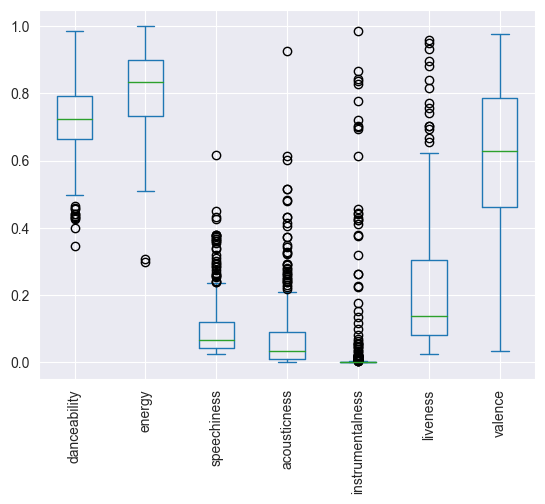

In [6]:
plt.figure(figsize=(5,5), dpi=600)
data = playlist[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
data.plot(kind='box')
plt.xticks(rotation=90);

Następnie, wykreślone zostaną histogramy wszystkich atrybutów znajdujących się w ramce danych dotyczących playlisty użytkownika. Pozwoli to wstępnie poznać ich rozkład.

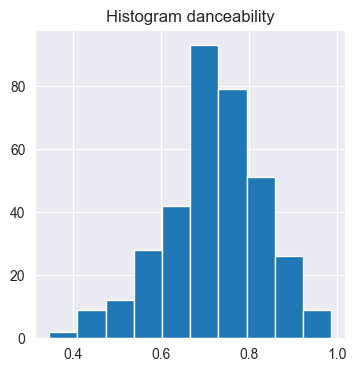

In [45]:
plt.figure(figsize=(4, 4))
plt.hist(playlist["danceability"])
plt.title("Histogram danceability");

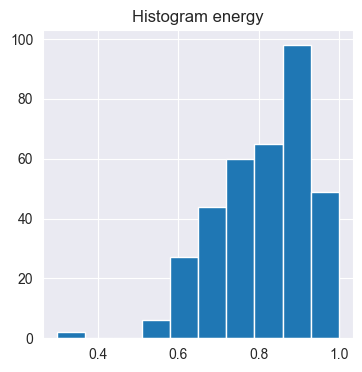

In [8]:
plt.figure(figsize=(4, 4))
plt.hist(playlist["energy"])
plt.title("Histogram energy");

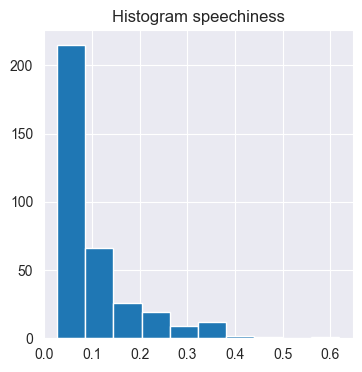

In [9]:
plt.figure(figsize=(4, 4))
plt.hist(playlist["speechiness"])
plt.title("Histogram speechiness");

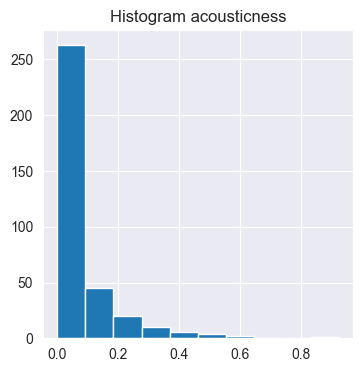

In [10]:
plt.figure(figsize=(4, 4))
plt.hist(playlist["acousticness"])
plt.title("Histogram acousticness");

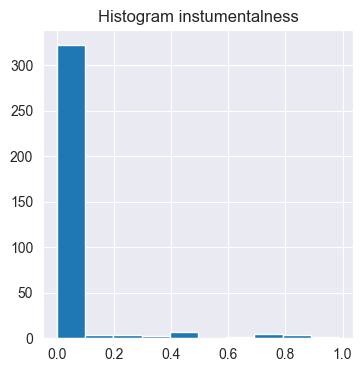

In [11]:
plt.figure(figsize=(4, 4))
plt.hist(playlist["instrumentalness"])
plt.title("Histogram instumentalness");

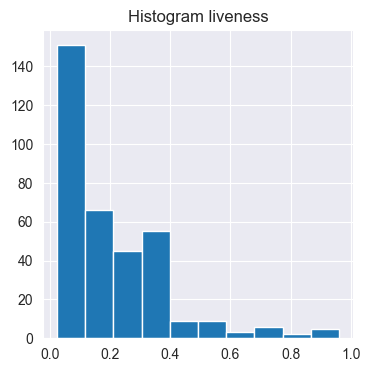

In [12]:
plt.figure(figsize=(4, 4))
plt.hist(playlist["liveness"])
plt.title("Histogram liveness");

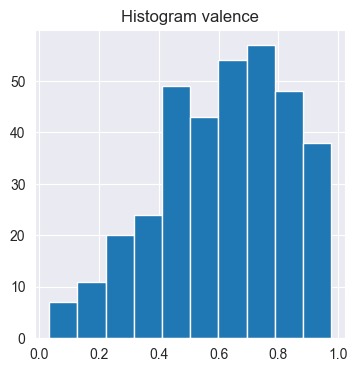

In [13]:
plt.figure(figsize=(4, 4))
plt.hist(playlist["valence"])
plt.title("Histogram valence");

In [85]:
playlist[["danceability","energy","speechiness", "acousticness", "instrumentalness", "liveness", "valence"]].describe()

danceability      energy  speechiness  acousticness  instrumentalness  \
count    351.000000  351.000000   351.000000    351.000000        351.000000   
mean       0.719444    0.810171     0.101725      0.078389          0.044197   
std        0.111136    0.115323     0.090024      0.115664          0.152897   
min        0.347000    0.298000     0.026500      0.000031          0.000000   
25%        0.663000    0.731500     0.044150      0.009045          0.000000   
50%        0.724000    0.833000     0.067900      0.033400          0.000013   
75%        0.792500    0.899000     0.121000      0.091700          0.001770   
max        0.986000    0.999000     0.618000      0.926000          0.987000   

         liveness     valence  
count  351.000000  351.000000  
mean     0.210277    0.613365  
std      0.178884    0.216953  
min      0.024100    0.035000  
25%      0.082600    0.463000  
50%      0.139000    0.630000  
75%      0.306000    0.786500  
max      0.960000    0.976000

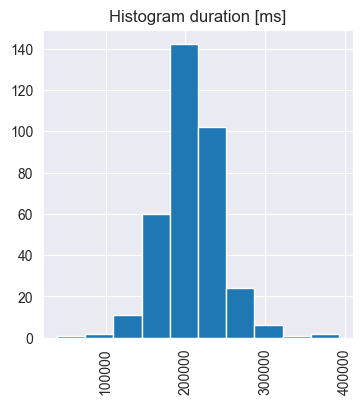

In [14]:
plt.figure(figsize=(4, 4))
plt.hist(playlist["duration_ms"])
plt.xticks(rotation=90)
plt.title("Histogram duration [ms]");

In [87]:
playlist[["duration_ms"]].describe()

duration_ms
count     351.000000
mean   208021.886040
std     39140.551179
min     39065.000000
25%    184587.500000
50%    208133.000000
75%    228165.500000
max    392812.000000

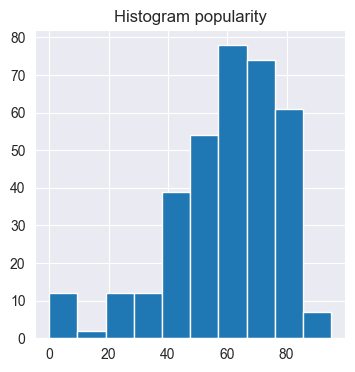

In [15]:
plt.figure(figsize=(4, 4))
plt.hist(playlist["popularity"])
plt.title("Histogram popularity");

In [89]:
playlist[["popularity"]].describe()

popularity
count  351.000000
mean    59.142450
std     18.618952
min      0.000000
25%     49.500000
50%     62.000000
75%     73.000000
max     95.000000

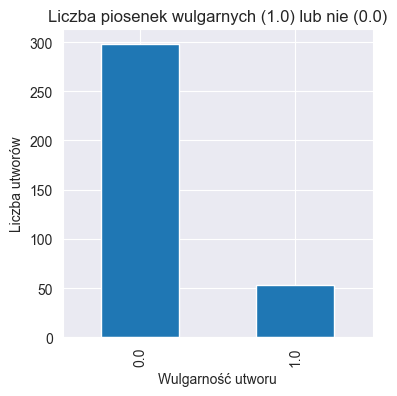

In [16]:
plt.figure(figsize=(4, 4))
plt.title("Liczba piosenek wulgarnych (1.0) lub nie (0.0)")
pd.value_counts(playlist[["explicit"]].values.flatten()).sort_index(axis=0).plot.bar()
plt.xlabel("Wulgarność utworu")
plt.ylabel("Liczba utworów");

Przedstawiony zostanie również wykres prezentujący liczbę utworów na przestrzeni lat. Pozwoli to wstępnie określić jak dużo lub mało jest piosenek starszych oraz tych najnowszych. Jak można zauważyć, w playliście użytkownika dominują utwory z lat ok. 2010/11, ale także tych niedawnych jak 2020-2022.

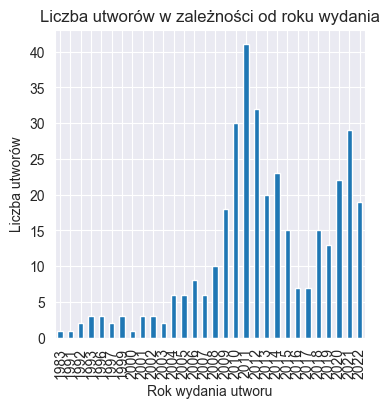

In [17]:
plt.figure(figsize=(4, 4))
plt.title("Liczba utworów w zależności od roku wydania")
pd.value_counts(playlist[["release_date"]].values.flatten()).sort_index(axis=0).plot.bar()
plt.xlabel("Rok wydania utworu")
plt.ylabel("Liczba utworów");

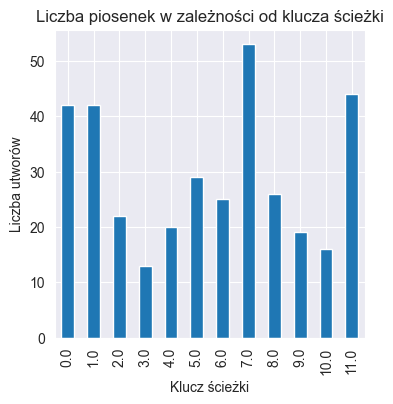

In [18]:
plt.figure(figsize=(4, 4))
plt.title("Liczba piosenek w zależności od klucza ścieżki")
pd.value_counts(playlist[["key"]].values.flatten()).sort_index(axis=0).plot.bar()
plt.xlabel("Klucz ścieżki")
plt.ylabel("Liczba utworów");

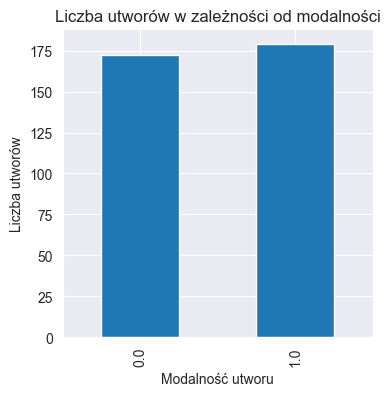

In [19]:
plt.figure(figsize=(4, 4))
plt.title("Liczba utworów w zależności od modalności")
pd.value_counts(playlist[["mode"]].values.flatten()).sort_index(axis=0).plot.bar()
plt.xlabel("Modalność utworu")
plt.ylabel("Liczba utworów");

Poniżej ciekawa obserwacja, z której wynika, iż znakomita większość utworów napisana jest w oparciu o jedno metrum oznaczone w ramce danych liczbą 4.0, która odzwierciedla metrum 4/4.

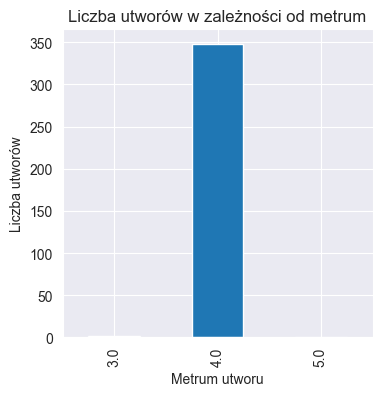

In [20]:
plt.figure(figsize=(4, 4))
plt.title("Liczba utworów w zależności od metrum")
pd.value_counts(playlist[["time_signature"]].values.flatten()).sort_index(axis=0).plot.bar()
plt.xlabel("Metrum utworu")
plt.ylabel("Liczba utworów");

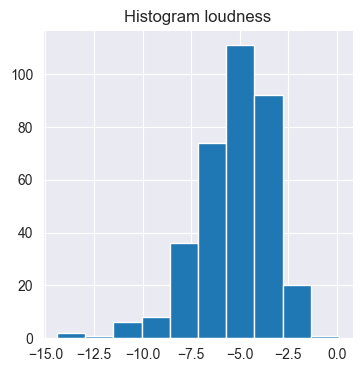

In [21]:
plt.figure(figsize=(4, 4))
plt.title("Histogram loudness")
plt.hist(playlist["loudness"]);

W tym miejscu zauważona powinna zostać anomalia, a więc wartość loudness, która przekracza 0 (max=0.108). Zgodnie z opisem zmiennych powinna ona przyjmować wartości z zakresu [-60, 0]. Anomalia ta zarówno w ramce danych dotyczącej playlisty jak i globalnej bazie danych zostanie obsłużona w dalszej części raportu.

In [22]:
playlist[["loudness"]].describe()

loudness
count  351.000000
mean    -5.308991
std      1.952229
min    -14.404000
25%     -6.373000
50%     -5.119000
75%     -3.944000
max      0.108000

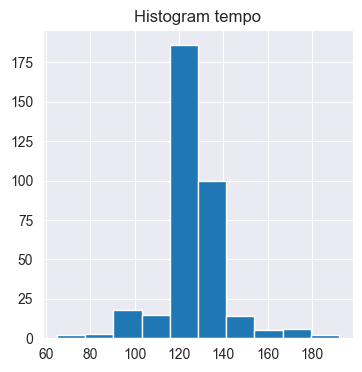

In [23]:
plt.figure(figsize=(4, 4))
plt.title("Histogram tempo")
plt.hist(playlist["tempo"]);

In [98]:
playlist[["tempo"]].describe()

tempo
count  351.000000
mean   127.462199
std     14.308149
min     65.043000
25%    124.029000
50%    127.985000
75%    130.032500
max    192.118000

Wyświetlone zostanie zestawienie 10 najczęściej występujących w playliście artystów.

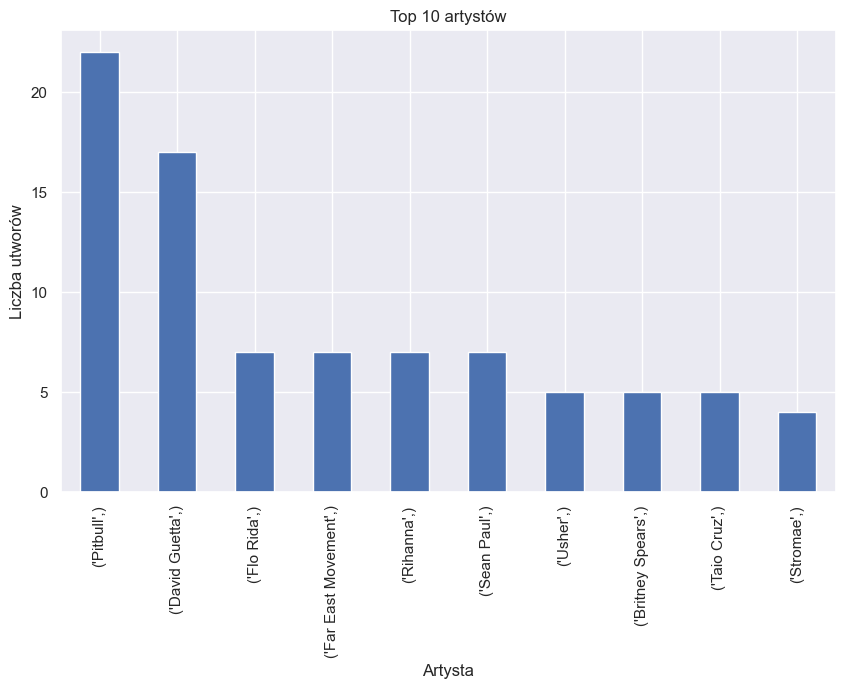

In [24]:
plt.figure(figsize=(10, 6))
plt.title("Top 10 artystów w playliście")
playlist[["artists"]].explode("artists").value_counts().head(10).plot.bar()
plt.xlabel("Artysta")
plt.ylabel("Liczba utworów");

## Analiza zależności między zmiennymi

W ramach analizy zależności między zmiennymi autorzy wytypowali ich zdaniem potencjalnie skorelowane zmienne, dla których zaprezentowane zostały wykresy poniżej.

Pierwszą z par było Tempo oraz Danceability. Zdaniem autorów ta para miała duży potencjał na korelację, gdyż utwory bardziej taneczne kojarzone są raczej z tymi szybszymi - posiadającymi więcej uderzeń na minutę w beacie. Niestety, zaprezentowany wykres ani tym bardziej wyznaczona linia trendu nie wydają się potwierdzać tej hipotezy.

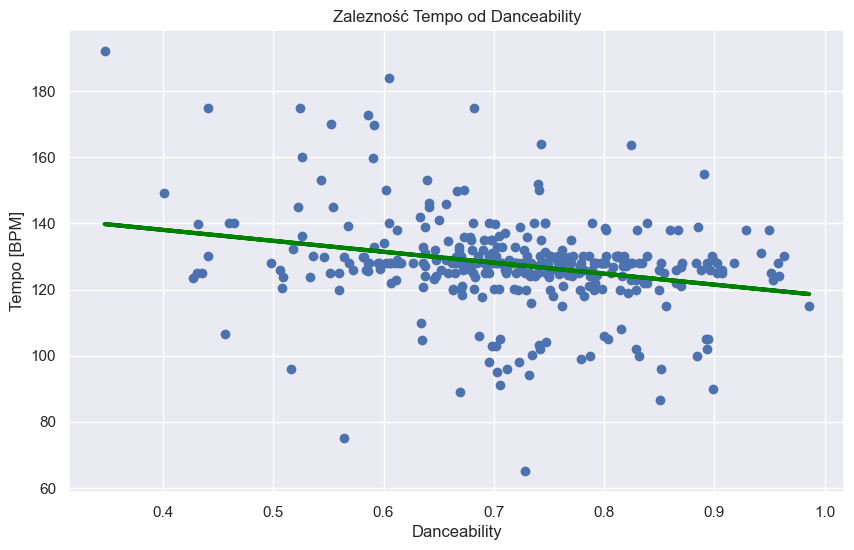

In [29]:
plt.figure(figsize=(10, 6))
plt.title("Zalezność Tempo od Danceability")
plt.scatter(playlist["danceability"], playlist["tempo"])

z = np.polyfit(playlist["danceability"], playlist["tempo"], 1)
p = np.poly1d(z)

plt.plot(playlist["danceability"], p(playlist["danceability"]), color='green', linewidth=3)

plt.xlabel("Danceability")
plt.ylabel("Tempo [BPM]");

Kolejną wytypowaną parą było Danceability oraz Speechiness. Zdaniem autorów w tym przypadku mogłaby sprawdzić się hipoteza, iż mniejsza liczba wypowiadanych słów w piosenkach (niska wartość Speechiness) wpływa pozytywnie na ich taneczność. Zaprezentowany wykres zdaje się jedynie częściowo potwierdzać tę myśl. Nie jest widoczny żaden konkretny trend, a jedynie zagęszczenie obserwacji posiadających niską wartość Speechiness w zakresie Danceability o wartości od 0.5 do 0.9.

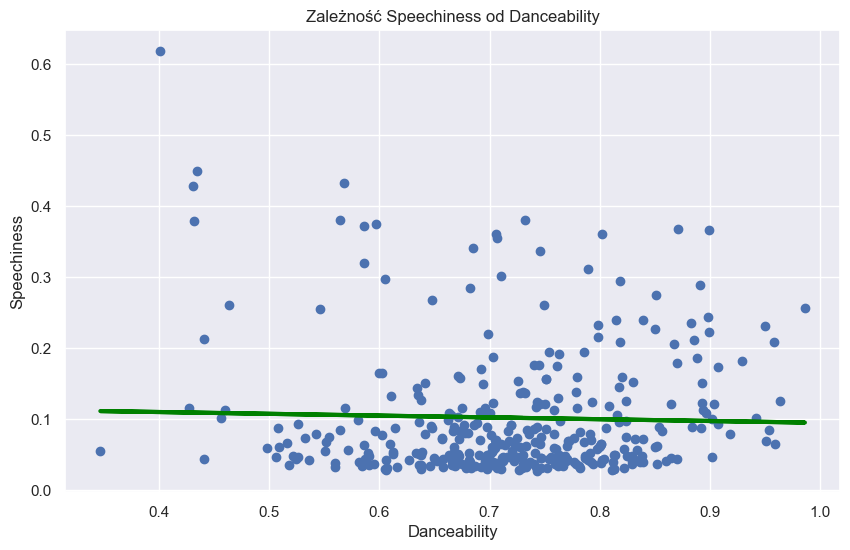

In [30]:
plt.figure(figsize=(10, 6))
plt.title("Zależność Speechiness od Danceability")
plt.scatter(playlist["danceability"], playlist["speechiness"])

z = np.polyfit(playlist["danceability"], playlist["speechiness"], 1)
p = np.poly1d(z)

plt.plot(playlist["danceability"], p(playlist["danceability"]), color='green', linewidth=3)

plt.xlabel("Danceability")
plt.ylabel("Speechiness");

Pierwszy sukces przy okazji typowanych par przyniosło Energy oraz Loudness. Okazuje się zgodnie z intuicją, iż wraz ze wzrostem głośności, piosenka zyskuje na energii. Trend ten nie jest niesamowicie wyraźny aczkolwiek zauważalny.

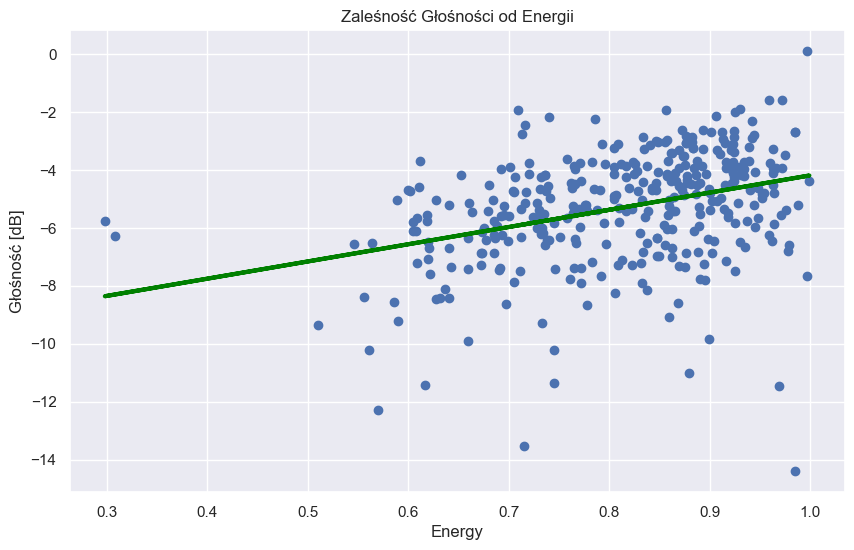

In [28]:
plt.figure(figsize=(10, 6))
plt.title("Zaleśność Głośności od Energii")
plt.scatter(playlist["energy"], playlist["loudness"])

z = np.polyfit(playlist["energy"], playlist["loudness"], 1)
p = np.poly1d(z)

plt.plot(playlist["energy"], p(playlist["energy"]), color='green', linewidth=3)
plt.xlabel("Energy")
plt.ylabel("Głośność [dB]");

Ostatnią z zaproponowanych przez autorów par jest Energy i Speechiness. Wydawać by się mogło, iż mniejsza liczba słów w piosence powoduje, że jej energia rośnie (piosenki typu dubstep czy podobne). Zaprezentowany wykres jednak ponownie obala tę tezę.

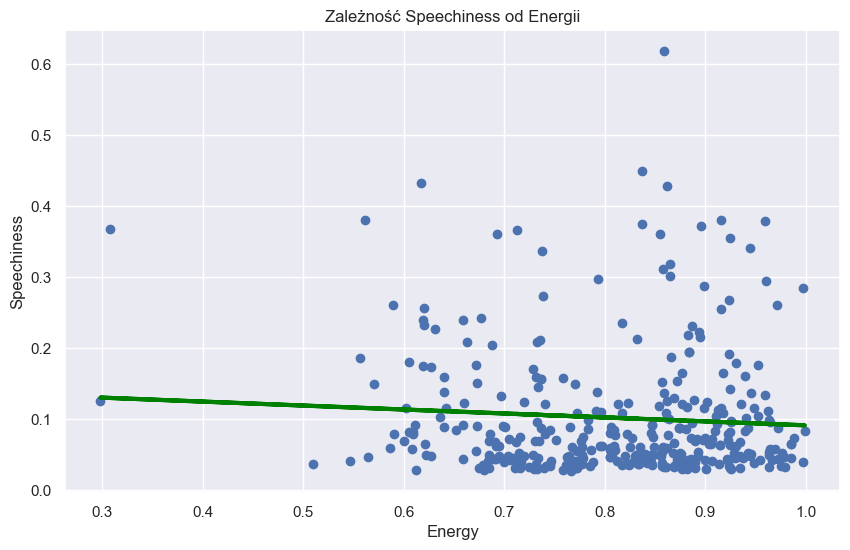

In [31]:
plt.figure(figsize=(10, 6))
plt.title("Zależność Speechiness od Energii")
plt.scatter(playlist["energy"], playlist["speechiness"])

z = np.polyfit(playlist["energy"], playlist["speechiness"], 1)
p = np.poly1d(z)

plt.plot(playlist["energy"], p(playlist["energy"]), color='green', linewidth=3)

plt.xlabel("Energy")
plt.ylabel("Speechiness");

Autorzy chcieli również sprawdzić czy wulgarność piosenek ma wpływ na ich popularność. Stąd podział piosenek na te określane jako wulgarne oraz nie i wykreślenie dla nich boxplotu. Nie wykazuje on jednak znaczących różnic co każe raczej sądzić, iż wulgarność piosenki nie ma wpływu na jej popoularność.

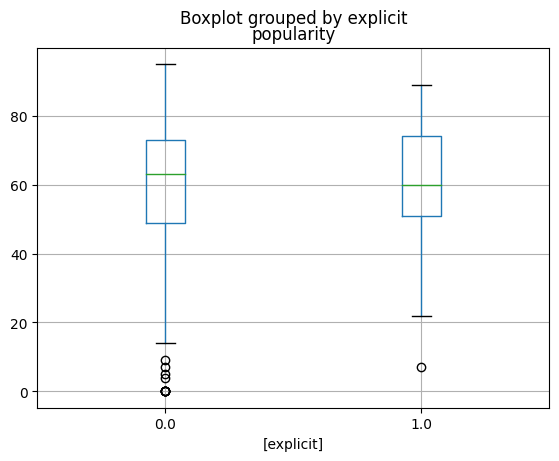

In [104]:
playlist.boxplot(column=["popularity"], by=['explicit']);

Dla uzupełnienia analizy zależności między zmiennymi, poniżej zaprezentowana zostanie macierz korelacji w postaci heatmapy. Zwyczajowo dopiero wartości od około 0.6 do 0.8 uważane są za silne relacje. W wygenerowanej heatmapie takich wartości nie znajdujemy. Najwyższa dodatnia korelacja to Energy i Loudness, które zostały już przeanalizowane wyżej. Jeśli mowa natomiast o ujemnej korelacji to najwyższą, o wartości -0.43 obserwujemy dla czasu trwania utworu oraz roku wydania. Interpretujemy to w ten sposób, że z roku na rok piosenki stawały się krótsze. Zostanie to zaprezentowane na kolejnym wykresie. Wniosek ogólny z tej sekcji jest taki, że wśród dostępnych danych nie występują silne korelacje.

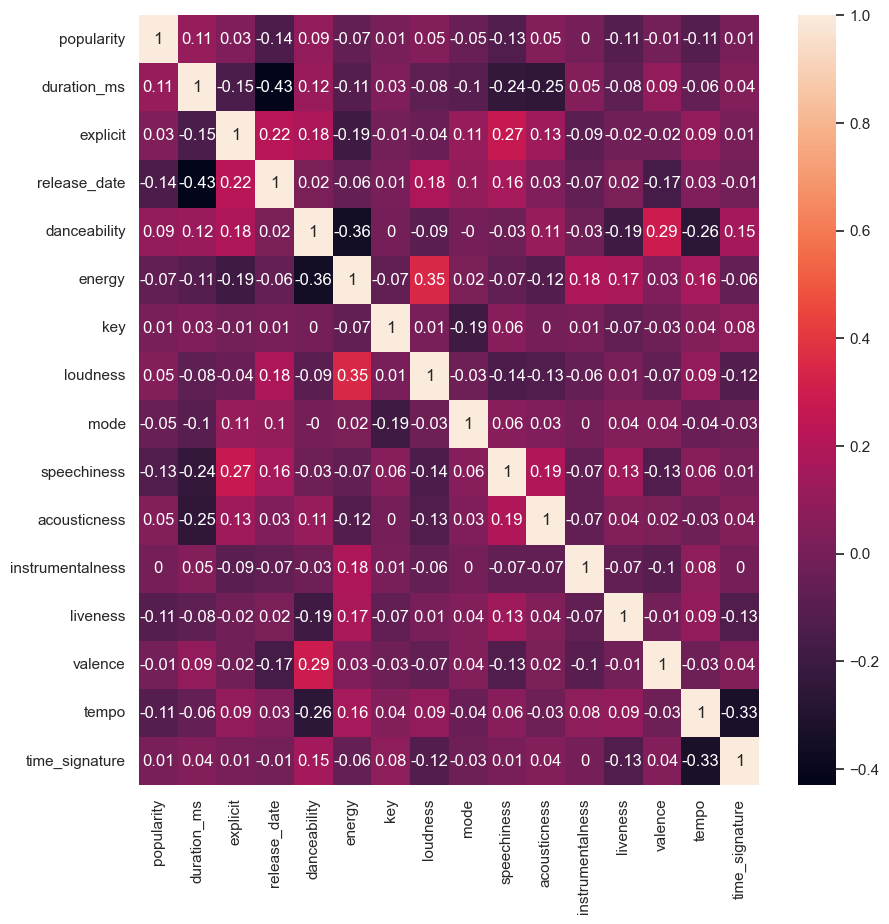

In [43]:
correlation_matrix = playlist.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix.round(2), annot=True);

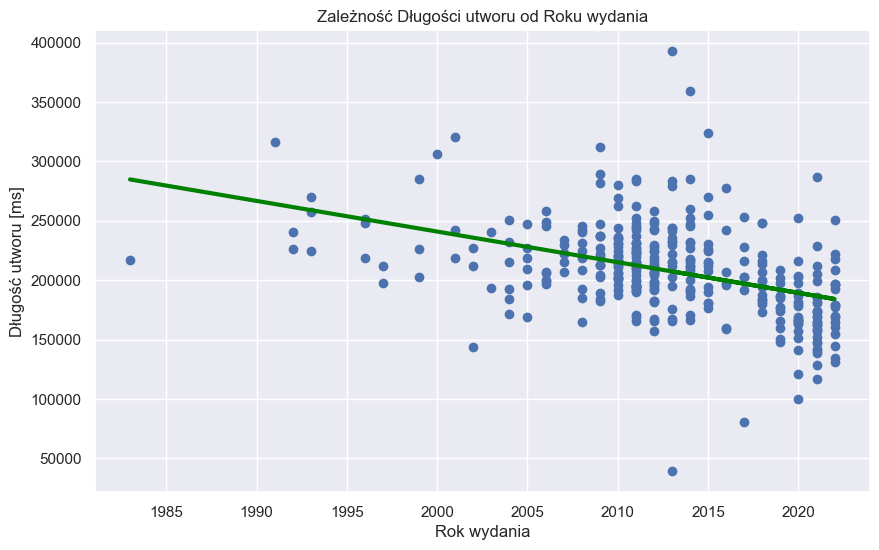

In [44]:
plt.figure(figsize=(10, 6))
plt.title("Zależność Długości utworu od Roku wydania")
plt.scatter(playlist["release_date"], playlist["duration_ms"])

z = np.polyfit(playlist["release_date"], playlist["duration_ms"], 1)
p = np.poly1d(z)

plt.plot(playlist["release_date"], p(playlist["release_date"]), color='green', linewidth=3)

plt.xlabel("Rok wydania")
plt.ylabel("Długość utworu [ms]");

Dotychczasowe rozważania dotyczyły danych związanych z playlistą użytkownika. Autorzy postanowili jednak dodatkowo zbadać, jak kształtuje się popularność utworu w zależności od jego długości korzystając z "globalnej" bazy danych. Okazuje się, że optycznie wykres taki prezentuje się podobnie do rozkładu chi-kwadrat ze szczytem w okolicy długości utworu 200 000 ms, czyli 3 minut i 20 sekund.


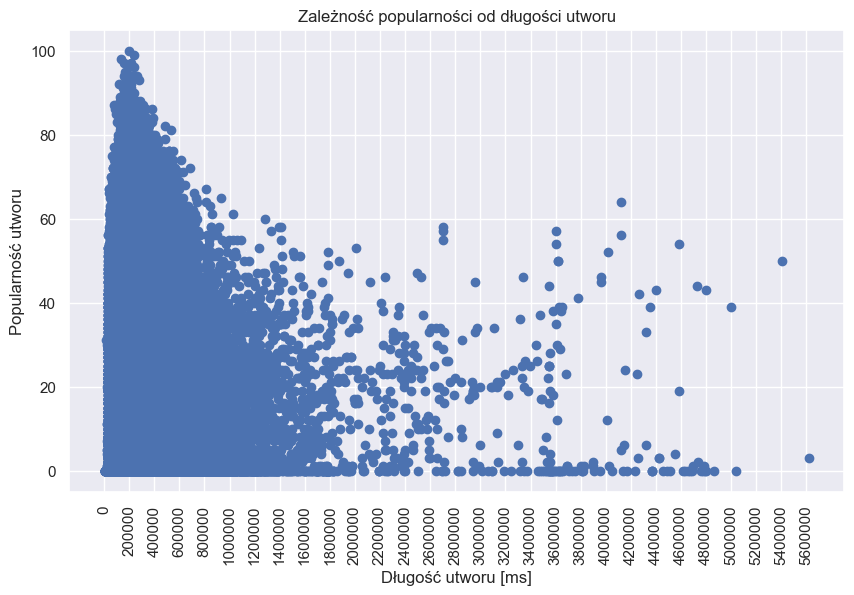

In [51]:
plt.figure(figsize=(10, 6))
plt.title("Zależność popularności od długości utworu")
plt.scatter(musicDF["duration_ms"], musicDF["popularity"])
plt.xticks(np.arange(0, max(musicDF["duration_ms"]), 200000.0))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.xlabel("Długość utworu [ms]")
plt.ylabel('Popularność utworu');

## Ciekawostki

### W poniższej sekcji analiza dotyczyć będzie "globalnej" bazy danych

In [56]:
musicDF['release_date'] = musicDF['release_date'].str[:4]

Pierwszym aspektem, którzy autorzy mieli zamiar zbadać była zmiana poszczególnych atrybutów w piosenkach na przestrzeni lat. Najbardziej zauważalny jest wzrost Energy a także spadek Acousticness. Zgodnie z oczekiwaniami starsze utwory posiadają atrybut Speechiness o wartościach wyższych niż aktualnie powstające utwory (utwory starsze to głównie melodie grane na instrumentach jak pianino nie zawierające słów). Pozostałe atrybuty z nie wykazują zauważalnych trendów. Ciekawym zjawiskiem jest wygładzenie wykresów wraz ze wzrostem roku wydania. Może to wskazywać, iż utworów nowszych jest w bazie danych więcej. Hipoteza ta została potwierdzona na kolejnym wykresie.

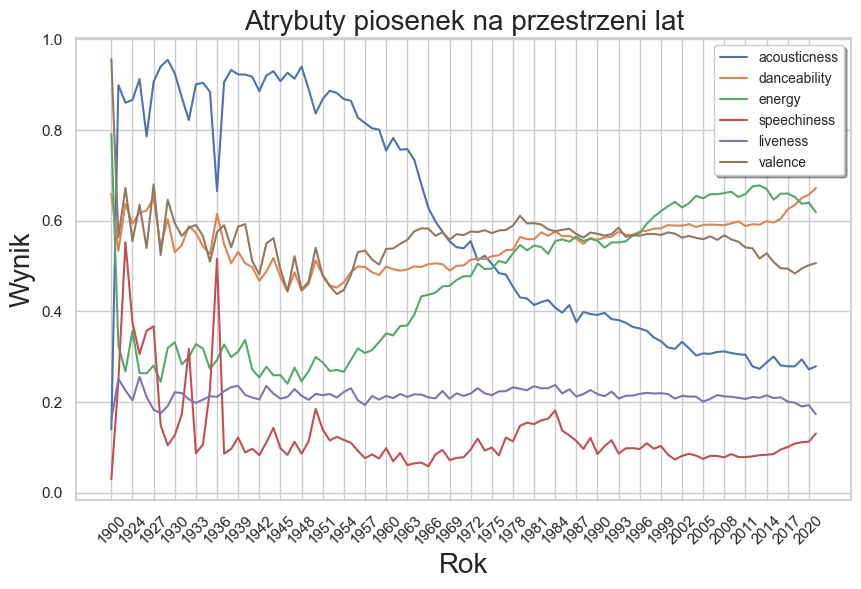

In [68]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for c in target_cols:
    x = musicDF.groupby("release_date")[c].mean()
    ax= sns.lineplot(x=x.index,y=x,label=c)

ax.set_title('Atrybuty piosenek na przestrzeni lat', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 10}, loc = 'upper right')
ax.set_ylabel('Wynik', fontsize = 20)
ax.set_xlabel('Rok', fontsize = 20)
ax.set_xticks(x.index[::3])
ax.set_xticklabels(x.index[::3], rotation=45);

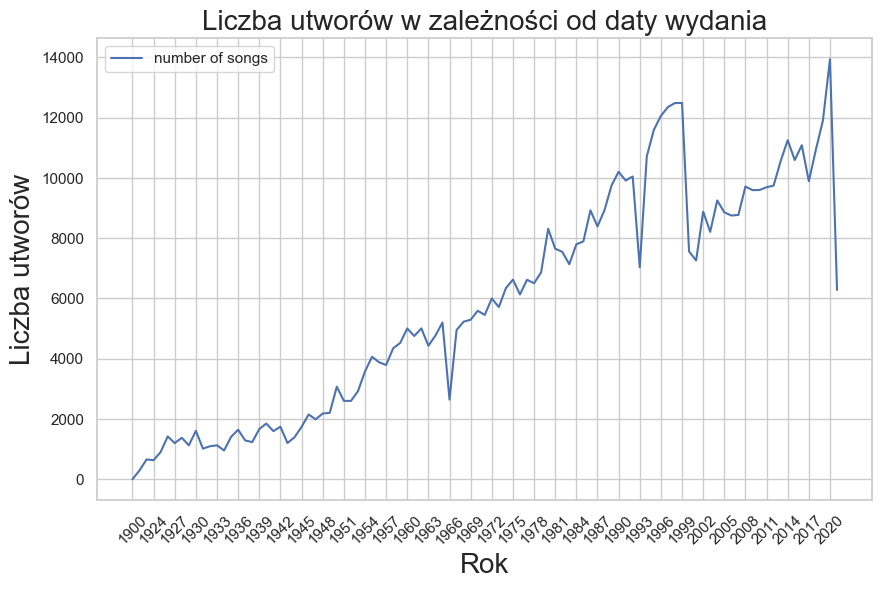

In [77]:
plt.figure(figsize=(10, 6))
x = musicDF.groupby('release_date')['id'].count()
ax = sns.lineplot(x= x.index, y=x, label="number of songs")
ax.set_title('Liczba utworów w zależności od daty wydania', fontsize = 20)
ax.set_ylabel('Liczba utworów', fontsize = 20)
ax.set_xlabel('Rok', fontsize = 20)
ax.set_xticks(x.index[::3])
ax.set_xticklabels(x.index[::3], rotation=45);

Wykreślona została również średnia głośność utworów na przestrzeni lat. Pomijając jednak starsze utwory, dla których nie dostępne są duże ilości danych zauważamy jedynie spadek średniej głośności od okolicy roku 2000.

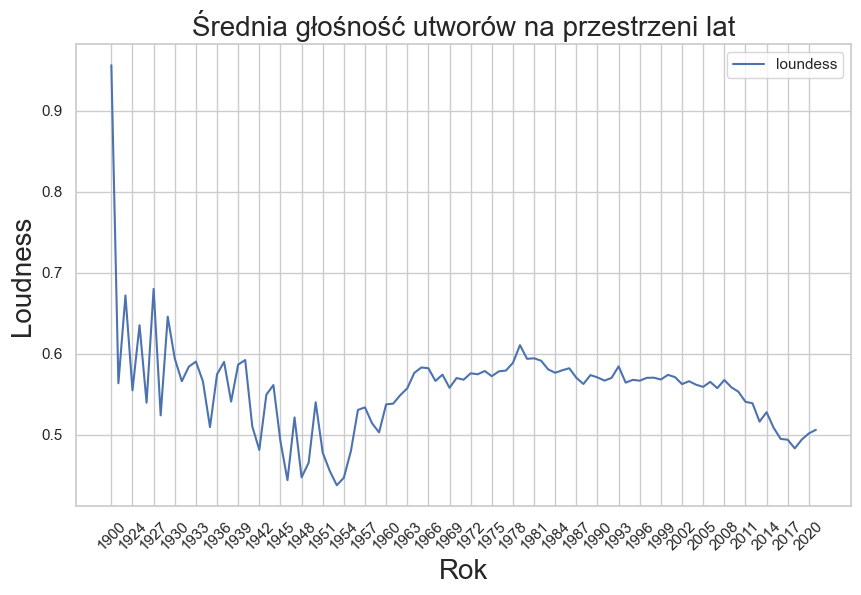

In [70]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x= x.index, y=x, label="loundess")
plt.title('Średnia głośność utworów na przestrzeni lat');
ax.set_title('Średnia głośność utworów na przestrzeni lat', fontsize = 20)
ax.set_ylabel('Loudness', fontsize = 20)
ax.set_xlabel('Rok', fontsize = 20)
ax.set_xticks(x.index[::3])
ax.set_xticklabels(x.index[::3], rotation=45);

Średnia długość utworu na przestrzeni lat również została wykreślona. Ta zmieniała się dość często i ponownie jedyny zauważalny trend to spadek średniej długości od lat około 2005. Co ciekawe, najstarsze utwory w bazie były jednak średnio jeszcze krótsze.

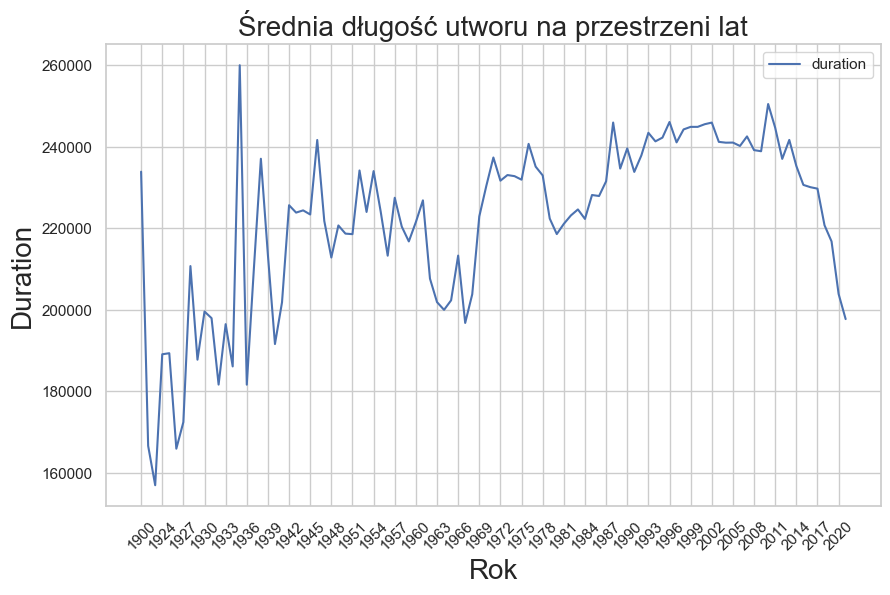

In [72]:
plt.figure(figsize=(10, 6))
x = musicDF.groupby('release_date')["duration_ms"].mean()
ax = sns.lineplot(x= x.index, y=x, label="duration")
ax.set_title('Średnia długość utworu na przestrzeni lat', fontsize = 20)
ax.set_ylabel('Duration', fontsize = 20)
ax.set_xlabel('Rok', fontsize = 20)
ax.set_xticks(x.index[::3])
ax.set_xticklabels(x.index[::3], rotation=45);

Autorzy postanowili jeszcze "zwizualizować gust" użytkownika bazując na jego playliście. Wynik ten chcieli odnieść do "globalnej" bazy danych. W tym celu wykreślony został radial plot, dla którego inspiracją były podobne wykresy prezentujące umiejętności piłkarzy pozwalające łatwo optycznie porównać ich do siebie. Otrzymany wynik jasno wskazuje, iż playlista użytkownika jest znacznie bardziej skierowana do energii oraz taneczności utworów, kosztem akustyczności, która z kolei jest znacznie wyższa w globalnej bazie danych.

In [78]:
categories = ["acousticness","danceability","energy","speechiness","liveness","valence"]
dbmeans = musicDF[categories].mean().values
playlistmeans = playlist[categories].mean().values

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=playlistmeans,
      theta=categories,
      fill='toself',
      name='Playlista'
))
fig.add_trace(go.Scatterpolar(
      r=dbmeans,
      theta=categories,
      fill='toself',
      name='Baza danych'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=True
)

fig.show()

# Milestone 3 - System rekomendacji

## Wczytanie danych oraz pozbycie się niepotrzebnych kolumn

Przygotowane w ramach poprzedniego etapu dane wczytujemy. Za generowanie rekomendacji odpowiedzialny będzie zmodyfikowany algorytm K-NN. Zmodyfikowany, dlatego że nie mamy tu do czynienia z klasyczną klasyfikacją. Nie posiadamy bowiem zbioru treningowego, który byłby etykietowany. Stąd algorytm K-NN wykorzystany zostanie jedynie do wskazania najbardziej podobnych do  playlisty użytkownika piosenek. W zależności od wskazanego parametru, n najbliższych sąsiadów stanowić będzie proponowane użytkownikowi rekomendacje. Dane związane z artystą czy nazwą piosenki na ten moment są niepotrzebne, więc aby ułatwić pracę algorytmowi obliczającemu odległości między utworami, zostaną one usunięte.

In [26]:
playlist = pd.read_csv('playlist.csv')
song_database = pd.read_csv('tracks.csv')
playlist = playlist.drop(columns=['id', 'name', 'artists', 'id_artists', 'duration_ms'])
song_database = song_database.drop(columns=['id', 'name', 'artists', 'id_artists', 'duration_ms'])
song_database["release_date"] = song_database["release_date"].str[:4].astype(int)

W trakcie podejścia do próby normalizacji danych, zauważone zostały anomalie związane z atrybutem 'loudness', który powinien przyjmować wartości od -60 do 0. Tymczasem w obu bazach, zarówno tej globalnej jak i dotyczącej playlisty występowały rekordy z wartością loudness przekraczającą 0. Postanowiliśmy je usunąć, ze względu na to, że nie mamy wpływu na to jakie są. Takie dostarcza API Spotify.

In [27]:
song_database = song_database[song_database.loudness <= 0]
playlist = playlist[playlist.loudness <= 0]

## Normalizacja danych

Dokonujemy normalizacji danych w celu zapobiegnięcia posiadania większego wpływu na wartość odległości, któregokolwiek z atrybutów. Przykładowo rok, który ma wartość około 2000, mógłby przyćmić drobne różnice a atrybutach takich jak 'danceability', które przyjmują wartości od 0 do 1. Niektóre z atrybutów przeskalowane zostały przy użyciu stałych wartości - Jak loudness co do którego mamy już gwarancję, iż jest w zakresie [-60, 0]. Inne wymagały sprawdzenia maksymalnej wartości z obu baz i wybrania tej większej do przeskalowania. Normalizacji podlegają naturalnie obie bazy.

In [28]:
database_max_tempo = song_database['tempo'].max()
playlist_max_tempo = playlist['tempo'].max()
max_tempo = np.max([playlist_max_tempo, database_max_tempo])

database_max_duration = song_database['duration_ms'].max()
playlist_max_duration = playlist['duration_ms'].max()
max_duration = np.max([database_max_duration, playlist_max_duration])

def normalize_data(data):
    data['popularity'] = data['popularity'].div(100)
    data['key'] = data['key'].add(1).div(12)
    data['loudness'] = data['loudness'].add(60).div(60)
    data['tempo'] = data['tempo'].div(max_tempo)
    data['time_signature'] = data['time_signature'].sub(3).div(4)
    data['duration_ms'] = data['duration_ms'].div(max_duration)
    data['release_date'] = data['release_date'].sub(1900).div(122)

    return data

song_database = normalize_data(song_database)
playlist = normalize_data(playlist)

## Obliczenie statystyk zbioru danych związanego z playlistą użytkownika

W celu wykonania rekomendacji z użyciem zmodyfikowanego algorytmu kNN potrzebujemy z playlisty wyciągnąć jedną piosenkę, która będzie ją reprezentować i do której piosenek podobnych szukać będziemy w bazie globalnej. W tym celu wyciągamy średnią z atrybutów, medianę oraz z ciekawości wartości maksymalne oraz minimalne. Zapisujemy te dane w ramce danych.

In [29]:
column_names = list(playlist.columns.values)
mean   = playlist[column_names].mean()
median = playlist[column_names].median()
max = playlist[column_names].max()
min = playlist[column_names].min()

stats = pd.DataFrame([mean, median, max, min]).T
stats.columns = ['mean', 'median', 'max', 'min']
stats = stats.T

stats

popularity  explicit  release_date  danceability    energy       key  \
mean      0.591743  0.148571      0.923958      0.719551  0.809637  0.533810   
median    0.625000  0.000000      0.918033      0.724500  0.833000  0.583333   
max       0.950000  1.000000      1.000000      0.986000  0.999000  1.000000   
min       0.000000  0.000000      0.680328      0.347000  0.298000  0.083333   

        loudness      mode  speechiness  acousticness  instrumentalness  \
mean    0.911259  0.508571     0.101202      0.078536          0.044323   
median  0.914633  1.000000     0.067850      0.033600          0.000013   
max     0.973867  1.000000     0.618000      0.926000          0.987000   
min     0.759933  0.000000     0.026500      0.000031          0.000000   

        liveness   valence     tempo  time_signature  
mean    0.208321  0.613529  0.516786            0.25  
median  0.138500  0.630500  0.519460            0.25  
max     0.960000  0.976000  0.779760            0.50  
min     0.024100  0.035000  0.263994            0.00

## Zmodyfikowany algorytm kNN

Zdecydowaliśmy się na wykorzystanie miary odległości euklidesowej oraz cosinusowej

In [24]:
def euclidean_distance(x1, x2):
    return np.linalg.norm(np.array(x1) - np.array(x2))

In [12]:
def cosine_distance(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return np.dot(x1, x2)/(np.linalg.norm(x1) * np.linalg.norm(x2))

### Algorytm

Na ten moment algorytm opiera się o wszystkie dostępne atrybuty zaczynając od daty wydania utworu, jego długości oraz popularności, kończąc na szeregu atrybutów opisujących cechy utworów jak energy czy danceability.

Zatem, na podstawie zmiennych:
- popularity
- duration_ms
- explicit
- release_date
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- livenes
- valence
- tempo
- time singature

Chcemy dokonać rekomendacji, a więc znaleźć w globalnej bazie danych piosenki najbliższe wyliczonym reprezentantom playlisty i przedstawić je użytkownikowi

Funkcja oblicza odległości od wszystkich utworów w globalnej bazie danych w sumie czterokrotnie - raz dla każdej z obliczonych statystyk. Wyniki obliczeń zapisujemy do ramki danych, a następnie do pliku, aby w przyszłości móc z nich szybciej skorzystać.

In [25]:
def knn_euclidean(stats, database):
    ranking = pd.DataFrame(columns=['mean', 'median', 'max', 'min'])
    for i in range(database.shape[0]):
        record = database.iloc[[i]].values.tolist()[0]
        mean   = euclidean_distance(stats.iloc[[0]].values.tolist(), record)
        median = euclidean_distance(stats.iloc[[1]].values.tolist(), record)
        max    = euclidean_distance(stats.iloc[[2]].values.tolist(), record)
        min    = euclidean_distance(stats.iloc[[3]].values.tolist(), record)
        ranking.loc[i] = [mean, median, max, min]

        if i % 10000 == 0:
            print('Checkpoint:', i)

    return ranking

In [23]:
def knn_cosine(stats, database):
    ranking = pd.DataFrame(columns=['mean', 'median', 'max', 'min'])
    for i in range(database.shape[0]):
        record = database.iloc[[i]].values.tolist()[0]
        mean   = cosine_distance(stats.iloc[[0]].values.tolist(), record)
        median = cosine_distance(stats.iloc[[1]].values.tolist(), record)
        max    = cosine_distance(stats.iloc[[2]].values.tolist(), record)
        min    = cosine_distance(stats.iloc[[3]].values.tolist(), record)
        ranking.loc[i] = [mean, median, max, min]

        if i % 10000 == 0:
            print('Checkpoint:', i)

    return ranking

In [ ]:
ranking = knn_euclidean(stats, song_database)
ranking.to_csv('ranking.csv')

In [46]:
ranking = pd.read_csv('ranking.csv')
ranking.head(10)

Unnamed: 0      mean    median       max       min
0           0  1.654118  1.650659  2.381036  1.613448
1           1  1.891274  1.881242  2.676406  1.887405
2           2  1.667751  1.648042  2.550789  1.677917
3           3  1.937240  1.925957  2.407977  1.958588
4           4  1.679705  1.937713  2.725813  1.235799
5           5  1.713155  1.688409  2.571350  1.614416
6           6  1.530319  1.491951  2.389443  1.756599
7           7  1.592232  1.565140  2.432069  1.719862
8           8  1.379061  1.661025  2.721757  1.053531
9           9  1.904150  1.897215  2.341477  1.964245

In [ ]:
ranking = knn_cosine(stats, song_database)
ranking.to_csv('ranking_cosine_no_duration.csv')

In [47]:
ranking = pd.read_csv('ranking_cosine_no_duration.csv')
ranking.head(10)

Unnamed: 0          mean        median           max           min
0           0  [0.67130407]  [0.71231374]  [0.78590164]  [0.54597851]
1           1  [0.60063795]  [0.64196096]  [0.66742729]  [0.45008603]
2           2  [0.65883157]  [0.71007284]  [0.73095092]  [0.46259306]
3           3  [0.57820735]  [0.62256924]  [0.75942696]  [0.38396609]
4           4  [0.62032831]  [0.55661067]   [0.7101538]  [0.58800041]
5           5  [0.63673245]  [0.69324715]   [0.7255146]  [0.49801775]
6           6  [0.72942809]  [0.77218472]   [0.7717168]  [0.49901314]
7           7  [0.70356514]  [0.74662283]  [0.76029361]  [0.50888748]
8           8  [0.76710126]  [0.70237639]   [0.7192341]   [0.6966644]
9           9  [0.59573362]  [0.63614339]  [0.77899765]  [0.39126355]

Jako że dane dotyczące artystów i tytułów zostały wcześniej usunięte, dopisaliśmy funkcję, która przywróci i przekaże użytkownikowi finalne rekomendacje.

In [30]:
def show_playlist(ranking, database, top):
    stats = ['mean', 'median', 'max', 'min']
    result = pd.DataFrame(columns=['metric', 'artists', 'name'])
    database.loc[:, 'artists'] = database.loc[:, 'artists'].apply(str2list)
    database.loc[:, 'id_artists'] = database.loc[:, 'id_artists'].apply(str2list)
    i = 0

    for stat in stats:
        rank_df = ranking.sort_values(by=[stat])
        rank_df = rank_df.head(top)
        indexes = list(rank_df.index.values)

        for index in indexes:
            name = database.iloc[index]['name']
            artists = database.iloc[index]['artists']
            result.loc[i] = [stat, artists, name]
            i += 1

    return result

## Rekomendacje - rezultat

Korzystamy z zapisanych plików i wyświetlamy rekomendacje użytkownikowi. Wpływ na wynik mają trzy parametry - DISTANCE, który decyduje o tym w oparciu o którą metrykę odległości powstały ranking zostanie wykorzystany; TOP, który wskazuje liczbę rekordów, które mają zostać wyświetlone oraz METRIC, który określa z jakiego reprezentanta playlisty użytkownik chce skorzystać (dostępne: mean, median, max oraz min)

In [73]:
DISTANCE = 'euclidean'
TOP = 30
METRIC = 'mean'

if DISTANCE == 'cosine':
    ranking = pd.read_csv('ranking_cosine.csv')
elif DISTANCE == 'euclidean':
    ranking = pd.read_csv('ranking.csv')

songs = pd.read_csv('tracks.csv')
songs = songs[songs.loudness <= 0]

recommendations = show_playlist(ranking, songs, TOP)
recommendations = recommendations.loc[recommendations['metric'] == METRIC]

recommendations

metric                                 artists  \
0    mean    ['Far East Movement', 'Cover Drive']   
1    mean                        ['Danny Romero']   
2    mean                         ['Floricienta']   
3    mean              ['Justin Bieber', 'Usher']   
4    mean                    ['Carly Rae Jepsen']   
5    mean                               ['TWICE']   
6    mean                       ['Chino & Nacho']   
7    mean       ['Il Pagante', 'Gemelli Diversi']   
8    mean                        ['La Casa Azul']   
9    mean                       ['Justin Bieber']   
10   mean                         ['Linkin Park']   
11   mean                     ['Riton', 'Kah-Lo']   
12   mean                               ['Ylvis']   
13   mean                          ['Katy Perry']   
14   mean                      ['Herman Flesvig']   
15   mean                      ['Ania Dabrowska']   
16   mean                      ['Good Charlotte']   
17   mean                     ['Gabriella Cilmi']   
18   mean                      ['Good Charlotte']   
19   mean                        ['Jill Johnson']   
20   mean      ['Robin Schulz', 'Alida', 'LUM!X']   
21   mean  ['Anna Margaret', 'Christopher Wilde']   
22   mean                  ['Nil Karaibrahimgil']   
23   mean                               ['Klaas']   
24   mean                            ['THE ROOP']   
25   mean                            ['Tony Igy']   
26   mean                            ['Zucchero']   
27   mean                              ['Thalia']   
28   mean                               ['TWICE']   
29   mean                            ['Chinaski']   

                                             name  
0                                Turn Up The Love  
1                                        Motívate  
2                                Flores Amarillas  
3                          Somebody To Love Remix  
4                               I Really Like You  
5                                     MORE & MORE  
6                                     Chica Ideal  
7       La Triste Storia Dei Ragazzi Di Provincia  
8                                 Podría Ser Peor  
9                                Somebody To Love  
10                                      Not Alone  
11     Rinse & Repeat (feat. Kah-Lo) - Radio Edit  
12               The Fox (What Does the Fox Say?)  
13                                I Kissed A Girl  
14                                  Det er fredag  
15                        Z Tobą Nie Umiem Wygrać  
16  I Don't Wanna Be In Love (Dance Floor Anthem)  
17                                 Sweet About Me  
18  I Don't Wanna Be In Love (Dance Floor Anthem)  
19                                  Crazy in Love  
20       In Your Eyes (feat. Alida) - LUM!X Remix  
21                   Something About the Sunshine  
22                           Seviyorum Sevmiyorum  
23                                          Money  
24                                     Discoteque  
25                     Astronomia - Never Go Home  
26             Baila Morena - New Spanish Version  
27                                      Amore Mio  
28                                STAY BY MY SIDE  
29                                           Víno

Wygenerowane rekomendacje autorzy uznają za poprawne. Piosenki te są skoczne, rytmiczne i wpisują się w 'imprezowy' klimat playlisty. Co ciekawe pojawiają się również piosenki w stylu latino, który to stanowił niewątpliwie część playlisty.

In [72]:
DISTANCE = 'cosine'
TOP = 30
METRIC = 'mean'

if DISTANCE == 'cosine':
    ranking = pd.read_csv('ranking_cosine.csv')
elif DISTANCE == 'euclidean':
    ranking = pd.read_csv('ranking.csv')

songs = pd.read_csv('tracks.csv')
songs = songs[songs.loudness <= 0]

recommendations = show_playlist(ranking, songs, TOP)
recommendations = recommendations.loc[recommendations['metric'] == METRIC]

recommendations

metric                                       artists  \
0    mean                           ['Louis Armstrong']   
1    mean                           ['Louis Armstrong']   
2    mean                           ['Louis Armstrong']   
3    mean                           ['Louis Armstrong']   
4    mean                           ['Louis Armstrong']   
5    mean                           ['Louis Armstrong']   
6    mean                           ['Louis Armstrong']   
7    mean                           ['Louis Armstrong']   
8    mean                           ['Louis Armstrong']   
9    mean                           ['Louis Armstrong']   
10   mean                           ['Louis Armstrong']   
11   mean                           ['Louis Armstrong']   
12   mean                             ['Benny Goodman']   
13   mean                             ['Benny Goodman']   
14   mean                             ['Sarah Vaughan']   
15   mean                             ['Future Rapper']   
16   mean                            ['Connie Francis']   
17   mean                            ['Connie Francis']   
18   mean                            ['Connie Francis']   
19   mean                            ['Connie Francis']   
20   mean                            ['Connie Francis']   
21   mean                            ['Connie Francis']   
22   mean                   ['John Lennon', 'Yoko Ono']   
23   mean  ['The West Coast Pop Art Experimental Band']   
24   mean             ['OSHO', 'Chaitanya Hari Deuter']   
25   mean                       ['Craig Of Farrington']   
26   mean                          ['Boards of Canada']   
27   mean                            ['Jaganmoy Mitra']   
28   mean                       ['James Newton Howard']   
29   mean                           ['Ignacio Corsini']   

                                   name  
0                           Pause Track  
1                           Pause Track  
2                           Pause Track  
3                           Pause Track  
4                           Pause Track  
5                           Pause Track  
6                           Pause Track  
7                           Pause Track  
8                           Pause Track  
9                           Pause Track  
10                          Pause Track  
11                          Pause Track  
12                   Pause Track - Live  
13                   Pause Track - Live  
14                          Pause Track  
15  StaggerLee Has His Day at the Beach  
16                     Anniversary Song  
17                  Wus Geven Ist Geven  
18                   Shein Vi Di Levone  
19                     Oifen Pripetchik  
20                    My Yiddishe Momme  
21                         Hava Nagilah  
22                  Two Minutes Silence  
23         Anniversary of World War III  
24               Fourth Stage (Silence)  
25      One Minute Of Silence (Really!)  
26                         Magic Window  
27           Jago Nari Jago Bonhishikha  
28                          Photographs  
29     La Mina del Ford - Remasterizado

Eksperyment z nową miarą odległości - cosinusową - nie przyniósł oczekiwanych rezultatów. Zaproponowane przez system rekomendacje są kompletnie nie trafne. Niektóre z nich są jedynie kilku-sekundowe i nie zawierają żadnych dźwięków. Inne to spokojne klasyczne utwory. Krótki czas trwania poszczególnych utworów podsunął autorom myśl, aby spróbować pominąć długość trwania utworu w obliczeniach dystansu. Zabieg ten niestety nie odmienił znacząco rekomendacji. Zmieniła się ich kolejność i niektóre z nich jednak ich charakter pozostał taki sam. Dlatego też autorzy uznali tę metodę za mniej skuteczną dla danego zastosowania.

Wygenerowane rekomendacje dla metryki MEAN dostępne są w poniższych playlistach:
[Playlista Rekomendacje (Odległość Euklidesowa)](https://open.spotify.com/playlist/3QtrIzk5zQb1xiYh6K1g7p?si=538f9fec2b9b4b3a)
[Playlista Rekomendacje (Odległość Cosinusowa)](https://open.spotify.com/playlist/6xFsymtOWrm5s9wO5xkext?si=81740bd73f484db1)

Zdaniem autorów reprezentant playlisty 'mean' będący średnimi z dostępnych atrybutów dostarcza najlepsze rezultaty. Ciekawy natomiast jest reprezentant 'max', który zwrócić powinien utwory podobne do ekstremalnych wartości cech piosenek z playlisty. I tak w rzeczywistości jest - są to w większości utwory rapowe, a więc zawierające dużą liczbę słów oraz dość szybkie tempo.

In [79]:
DISTANCE = 'euclidean'
TOP = 30
METRIC = 'max'

if DISTANCE == 'cosine':
    ranking = pd.read_csv('ranking_cosine.csv')
elif DISTANCE == 'euclidean':
    ranking = pd.read_csv('ranking.csv')

songs = pd.read_csv('tracks.csv')
songs = songs[songs.loudness <= 0]

recommendations = show_playlist(ranking, songs, TOP)
recommendations = recommendations.loc[recommendations['metric'] == METRIC]

recommendations

metric                                            artists  \
60    max                                  ['Pezet', 'NOON']   
61    max                                    ['Frank Ocean']   
62    max                                 ['Kendrick Lamar']   
63    max                                           ['УННВ']   
64    max                                         ['Eminem']   
65    max                                 ['Alabama Shakes']   
66    max                                ['Cartel De Santa']   
67    max                    ['B.U.G. Mafia', 'Magic Touch']   
68    max                                         ['Eminem']   
69    max                                     ['Alligatoah']   
70    max                                    ['Nappy Roots']   
71    max                                    ['Nappy Roots']   
72    max                       ['Trueno', 'Taiu', 'TATOOL']   
73    max                ['Madvillain', 'Madlib', 'MF DOOM']   
74    max  ['DA Uzi', 'Ninho', 'SCH', 'Hornet La Frappe',...   
75    max  ['MC Menor da VG', 'Mc Kadu', 'Mc Dimenor Dr',...   
76    max                                        ['Sublime']   
77    max  ['El Alfa', 'Chael Produciendo', 'CJ', 'El Che...   
78    max   ['Madvillain', 'Madlib', 'MF DOOM', 'Quasimoto']   
79    max                                         ['J-Live']   
80    max                                        ['Max DLG']   
81    max                                         ['Eminem']   
82    max                             ['Saba', 'Jean Deaux']   
83    max                                          ['Shokk']   
84    max  ['DA Uzi', 'Ninho', 'SCH', 'Hornet La Frappe',...   
85    max                                          ['Drake']   
86    max                         ['Two Maloka', 'Mc Topre']   
87    max                                    ['Nappy Roots']   
88    max                                    ['Nicki Minaj']   
89    max  ['Dalex', 'Lyanno', 'Sech', 'Justin Quiles', '...   

                                                 name  
60                                           W Branży  
61                                         In My Room  
62                                                  i  
63                                      Поэзия фольги  
64                                            Rap God  
65                                     Always Alright  
66                              Si Te Vienen a Contar  
67                                 Ziua Independentei  
68                                            Rap God  
69                                             Narben  
70                                           Good Day  
71                                           Good Day  
72                                               Ñeri  
73                                       Money Folder  
74  La vie du binks (feat. Hornet La Frappe, Leto,...  
75                                 SET DO DJ VICTOR 2  
76                                          Cisco Kid  
77                                 La Mamá de la Mamá  
78                             America's Most Blunted  
79                                    Them That's Not  
80                                         Pars de là  
81                                            Rap God  
82                                     Photosynthesis  
83  You Reposted in the Wrong Neighborhood I Glue7...  
84  La vie du binks (feat. Hornet La Frappe, Leto,...  
85                                             Energy  
86  Eu Caçava as Puta, Agora as Puta Que Me Caça (...  
87                                           Good Day  
88                                         Super Bass  
89                               Vuelva A Ver - Remix

### Metryka oceny modelu

Wobec braku etykiet danych oraz zmodyfikowanego podejścia do algorytmu kNN ciężkim zadaniem jest jakkolwiek ocenić jakość generowanych rekomendacji. Jedynym sposobem porównania piosenek jaki przyszedł nam na myśl jest metryka odległości, która została jednak użyta już w algorytmie generowania rekomendacji. Jej wartości zaprezentowane zostały poniżej. Po jednym z etapów projektu zaproponowana została jednak przez Prowadzącą metoda sprawdzenia korelacji Spearmana pomiędzy rankingami, która przeprowadzona oraz opisana została w dalszej części raportu.

In [74]:
rank_df = ranking.sort_values(by=[METRIC])
rank_df = rank_df.head(TOP)
rank_df

Unnamed: 0      mean    median       max       min
175683      175683  0.529773  0.164286  2.007291  1.659227
351200      351200  0.533635  0.107722  2.126616  1.589462
154949      154949  0.533798  0.108502  2.122195  1.573706
199624      199624  0.534408  0.140431  2.151931  1.553305
278504      278504  0.535132  0.172157  2.134689  1.553231
562371      562371  0.535694  0.158786  2.124556  1.584183
210560      210560  0.535960  0.221321  2.086114  1.564532
399184      399184  0.536879  0.171851  2.114945  1.554964
352529      352529  0.538709  0.189338  2.103275  1.593343
583101      583101  0.539412  0.190739  2.127925  1.566516
131289      131289  0.539704  0.177578  2.095751  1.550027
443913      443913  0.540118  0.155551  2.118562  1.574625
86549        86549  0.540124  0.126172  2.089245  1.619434
186282      186282  0.540436  0.147268  2.134202  1.587129
344569      344569  0.540550  0.183234  2.159064  1.525166
569023      569023  0.540802  0.240716  2.082969  1.555096
81810        81810  0.540833  0.139259  2.110497  1.603659
81816        81816  0.541103  0.163651  2.115452  1.555148
118091      118091  0.541481  0.141414  2.110958  1.602632
581992      581992  0.541931  0.221149  2.117708  1.525940
178380      178380  0.542368  0.193658  2.007843  1.662228
130946      130946  0.542794  0.185648  2.076994  1.625911
370921      370921  0.543041  0.212037  2.009021  1.615533
500792      500792  0.543140  0.190447  2.079214  1.619326
246518      246518  0.543541  0.166161  2.114424  1.616067
178116      178116  0.544277  1.010574  2.296448  1.271477
198031      198031  0.545042  0.151085  2.166679  1.546771
426832      426832  0.545915  0.236260  2.093711  1.584257
561609      561609  0.546471  0.241822  2.114343  1.565201
263866      263866  0.546486  0.185320  2.144540  1.549566

Duplikaty w 'globalnej' bazie utworów spowodowane są faktem, iż ich przegląd wykonaliśmy w oparciu o id piosenki, które dla tych utworów jest różne. Prawdopodobnie jedna z nich pochodzi z albumu, natomiast druga jest singlem. Lub też jedna jest wersją koncertową, natomiast druga studyjną.


#### Ocena modelu - korelacja Spearmana

Zaproponowana metoda polega na ręcznej ocenie wybranego zestawu piosenek (uszeregowaniu ich od najbardziej do najmniej pasującej do playlisty użytkownika) i porównaniu powstałego rankingu z uszeregowaniem wyznaczonym przez zaimplementowany system przy pomocy korelacji Spearmana.

W tym celu wybrane zostały cztery piosenki pochodzące z rekomendacji wewnątrz aplikacji Spotify:
- Turn Around (5,4,3,2,1)
- There She Goes
- Hotel Room Service
- Danza Kuduro

Dwie będące zdaniem jednego z autorów podobne do charakteru playlisty:
- Despacito
- Intercontinental bajers

Dwie bardzo spokojne, raczej nie pasujące do playlisty:
- Stand By Me - Remastered
- Hello

Jedna absurdalna, świąteczna choć przy tym całkiem skoczna:
- Merry Christmas Everyone

Oraz jedna kompletnie nie pasująca do playlisty, klasyczna, autorstwa Chopina:
- Nocturne in C-Sharp Minor, B. 49

Ten podział został skonstruowany celowo, aby ułatwić ankietowanym ułożenie rankingu. Wyniki zebrane zostały w pliku Excelowym i później wczytane do programu. Dodatkowo, naturalnie obliczony został ranking pochodzący z zaimplementowanego systemu rekomendacji.

In [75]:
TOP = 10
METRIC = 'mean'

picked10 = pd.read_csv('selected_tracks.csv', sep=';')
picked10 = picked10.drop(columns=['id', 'name', 'artists', 'id_artists', 'duration_ms'])


picked10["release_date"] = picked10["release_date"].str[-4:].astype(int)
picked10 = normalize_data(picked10)

ranking = knn_euclidean(stats, picked10)
ranking.head(10)
#
picked10 = pd.read_csv('selected_tracks.csv', sep=';')
recommendations = show_playlist(ranking, picked10, TOP)
recommendations = recommendations.loc[recommendations['metric'] == METRIC]
recommendations.to_csv('ranking10.csv')

recommendations

Checkpoint: 0


metric                                   artists  \
0   mean                              ['Flo Rida']   
1   mean                             ['Taio Cruz']   
2   mean                               ['Pitbull']   
3   mean            ['Luis Fonsi', 'Daddy Yankee']   
4   mean                       ['Solar', 'Białas']   
5   mean                   ['Don Omar', 'Lucenzo']   
6   mean                       ["Shakin' Stevens"]   
7   mean                           ['Ben E. King']   
8   mean                         ['Lionel Richie']   
9   mean  ['Frédéric Chopin', 'Janusz Olejniczak']   

                               name  
0           Turn Around (5,4,3,2,1)  
1                    There She Goes  
2                Hotel Room Service  
3                         Despacito  
4           Intercontinental bajers  
5                      Danza Kuduro  
6          Merry Christmas Everyone  
7          Stand By Me - Remastered  
8                             Hello  
9  Nocturne in C-Sharp Minor, B. 49

Wyniki te zdaniem autorów są satysfakcjonujące jednak zestawione zostały one dodatkowo z opinią potencjalnych użytkowników. Darek (jeden z autorów, który nie widział wcześniej wyników rekomendacji systemu) oraz Patryk i Marcin (zbieżność imion) stworzyli własne rankingi przygotowanych utworów. Wyniki zaprezentowane zostały w ramce danych poniżej. Dodatkowo ze względu na lekką ich rozbieżność obliczony został średni ranking. Miejsce 1 w rankingu dawało piosence 10 punktów natomiast ostatnie 0. Więc liczba punktów to była suma z trzech rankingów wartości (10 - miejsce w rankingu). W ten sposób powstała dodatkowa kolumna - ranking_sumaryczny/

In [77]:
ranked_recommendations = pd.read_csv('ranking10.csv', sep=';')
ranked_recommendations

Unnamed: 0 metric                                       artists  \
0           0   mean                                ["'Flo Rida'"]   
1           1   mean                               ["'Taio Cruz'"]   
2           2   mean                                 ["'Pitbull'"]   
3           3   mean            ["'Luis Fonsi'", "'Daddy Yankee'"]   
4           4   mean                       ["'Solar'", "'Białas'"]   
5           5   mean                   ["'Don Omar'", "'Lucenzo'"]   
6           6   mean                        ['"Shakin\' Stevens"']   
7           7   mean                             ["'Ben E. King'"]   
8           8   mean                           ["'Lionel Richie'"]   
9           9   mean  ["'Frédéric Chopin'", "'Janusz Olejniczak'"]   

                               name  system_ranking  ranking_Darek  \
0           Turn Around (5,4,3,2,1)               1              3   
1                    There She Goes               2              1   
2                Hotel Room Service               3              2   
3                         Despacito               4              5   
4           Intercontinental bajers               5              6   
5                      Danza Kuduro               6              4   
6          Merry Christmas Everyone               7              7   
7          Stand By Me - Remastered               8              8   
8                             Hello               9              9   
9  Nocturne in C-Sharp Minor, B. 49              10             10   

   ranking_Patryk  ranking_Marcin  ranking_sumaryczny  
0               5               3                   3  
1               1               1                   1  
2               3               2                   2  
3               4               4                   5  
4               6               5                   6  
5               2               6                   4  
6               9               7                   7  
7               7               8                   8  
8               8               9                   9  
9              10              10                  10

Wyniki korelacji Spearmana zaprezentowano poniżej. Najniższa wartość występuje przy rankingu Patryka i jest to 0.(75). Jak na korelację Spearmana jest to względnie wysoki wynik co wskazuje na dość silną korelację, ponieważ przedział wartości jaki możemy otrzymać z tej metody to [-1, 1]. Pozostałe rankingi wykazują już tylko wyższą korelację. Potwierdzeniem tego jest ranking sumaryczny, który osiąga taką samą wartość jak ranking Darka. Na tej podstawie oraz bazując na subiektywnej interpretacji otrzymanych rekomendacji autorzy uważają, iż system działa poprawnie.

In [78]:
sumSquareDiffs_D = sum((ranked_recommendations['system_ranking'] - ranked_recommendations['ranking_Darek'])**2)
sumSquareDiffs_P = sum((ranked_recommendations['system_ranking'] - ranked_recommendations['ranking_Patryk'])**2)
sumSquareDiffs_M = sum((ranked_recommendations['system_ranking'] - ranked_recommendations['ranking_Marcin'])**2)
sumSquareDiffs_all = sum((ranked_recommendations['system_ranking'] - ranked_recommendations['ranking_sumaryczny'])**2)
n = ranked_recommendations.shape[0]
spearman_D = 1 - 6*sumSquareDiffs_D/(n*(n**2 - 1))
spearman_P = 1 - 6*sumSquareDiffs_P/(n*(n**2 - 1))
spearman_M = 1 - 6*sumSquareDiffs_M/(n*(n**2 - 1))
spearman_all = 1 - 6*sumSquareDiffs_all/(n*(n**2 - 1))
print(f'Wartości korelacji Spearmana dla rankingów:\n\nDarka:\t\t\t{spearman_D}\nPatryka:\t\t{spearman_P}\nMarcina:\t\t{spearman_M}\nSumarycznego:\t{spearman_all}')

Wartości korelacji Spearmana dla rankingów:

Darka:			0.9272727272727272
Patryka:		0.7575757575757576
Marcina:		0.9636363636363636
Sumarycznego:	0.9272727272727272
